# Activation functions:

- activatiefunctie nodig want anders blijft lineair; je krijgt niks nieuws
- met activatiefunctie; niet lineair: je kan zo wat alles gaan voorspellen

## Step function:

- Wordt uiteindelijk niet meer gebruilt omdat het moeilijk is voor een zinvolle gradient te bekomen
- output ranges van -1 tot 1
- *Finally, if you want to guarantee that the predictions will fall within a given range of values, than you can use the logistic function or the hyperbolic trangent, and then scale the labels*

## Sigmoid function:

- Vervanger van de step function
- output ranges van 0 tot 1

## Hyperbolic Tangent:

- Output value ranges from -1 to 1
- that range tends to make each layers output more or less centered around 0 at the beginning of training, which often helps speed up convergence.
- *Finally, if you want to guarantee that the predictions will fall within a given range of values, than you can use the logistic function or the hyperbolic trangent, and then scale the labels*
- default in RNNs

## ReLU (Rectified Logistic unit):

- Is continuous but unfortunately not differentiable at z = 0 (the slope changes abruptly, which can make Gradient Descent bounce around), and its derivative is o for z < 0.
- In practice, however, ReLU works very well and has the advantage of being fat to compute, so it *has become the default*
- ranges van 0 tot inf
- If you want to guarantee that the output will always be positive, then you can use the ReLU function in the output layer

![Untitled](https://prod-files-secure.s3.us-west-2.amazonaws.com/0ed349cd-f1a9-4c5a-bda4-a696aee42672/4aafe447-9e6e-440c-a6a1-618a57165f0f/Untitled.png)

## Softplus:

- Alternatively, you can use the softplus activation function, which is a smooth variant of ReLU
- It is close to 0 when z is negative, and close to z when z is positive

## Softmax:

- Softmax is typically used for a **multiclass classification**
- The softmax is calculated as follows:
- First, compute exp z = e for each z, you get (e, e, … ,e)
- All the numbers are now positive

![Untitled](https://prod-files-secure.s3.us-west-2.amazonaws.com/0ed349cd-f1a9-4c5a-bda4-a696aee42672/0a598ad0-12cc-4210-a776-20c66caaaed8/Untitled.png)

# Loss function for Regression MLPs

The loss function to use during training is typically the mean squared error , but if you have a lot of outliers in the training set, you may prefer to use the mean absolute error instead

## Huber Loss

- The huber loss is a combination of MSE and MAE.
    - It’s a quadratic for small errors, but linear for larger errors
    
    ![Untitled](https://prod-files-secure.s3.us-west-2.amazonaws.com/0ed349cd-f1a9-4c5a-bda4-a696aee42672/d83fe1c1-ab05-4370-a83a-f845916df803/Untitled.png)
    
    In this formula, y is the number of the true label, while y^ is the predicted value
    Note: in general the Huber loss also contains a parameter δ that determines the threshold at which the loss changes from quadratic to linear. In the above formula, δ = 1
    
    ![Untitled](https://prod-files-secure.s3.us-west-2.amazonaws.com/0ed349cd-f1a9-4c5a-bda4-a696aee42672/33b02937-4bd6-47af-8cc2-b5f3932be405/Untitled.png)
    
    ## MSE
    
    We recap the loss function for regression problems. The MSE should be familiar to you from previous courses:
    
    ![Untitled](https://prod-files-secure.s3.us-west-2.amazonaws.com/0ed349cd-f1a9-4c5a-bda4-a696aee42672/b36ce147-deab-4ecc-a7c6-5b52411f3cb1/Untitled.png)
    
    Here, m is the number of examples, y^(i) is the predicted value for example I and y(i) is the true value for example I .
    
    # Loss function Classification
    
    - For a binary classification problem, you just need a single output neuron using the logistic activation function
        - The output will be a number between 0 and 1, which is interpreted as the estimated probability of the positive class
        - This is the same interpretation as for logistic regression

For example, you could have an email classification system that predicts whether each incoming email is ham or spam, and simultaneously predicts whether it is an urgent or nonurgent email. In this case you would need two output neurons, both using logistic activation function: the first would output the probability that the email is spam, and the second would output the probability that its urgent.

**If each instance belongs to a single class**, out of three or more possible classes (e.g. classes 0 to 9 for digit classification, then you need one output neuron per class, and you should use the **softmax activation** for the output layer)

![Untitled](https://prod-files-secure.s3.us-west-2.amazonaws.com/0ed349cd-f1a9-4c5a-bda4-a696aee42672/6bb91c64-eee1-40f0-bb87-1350c93de707/Untitled.png)

## **Binary Cross entropy**

- the binary Cross Entropy loss for a single example:

![Untitled](https://prod-files-secure.s3.us-west-2.amazonaws.com/0ed349cd-f1a9-4c5a-bda4-a696aee42672/f2c707f4-8fd5-486d-92b4-9be685a75ee4/Untitled.png)

- here y is the true label, which is either 0 or 1, while y^ is the predicted probability that the label is 1.

 Note: the binary cross entropy is the loss function used in logistic regression

## **Categorical Cross Entropy**

- The categorical cross entropy generalizes the binary cross entropy to the case where there are more than K classes (with k>2 ). For a single example, it is defined as:

![Untitled](https://prod-files-secure.s3.us-west-2.amazonaws.com/0ed349cd-f1a9-4c5a-bda4-a696aee42672/618d5605-42a1-4506-8764-edb06dea058f/Untitled.png)

- Here, y is a one-hot encoded vector of length k and y^ is a vector of length k containing the predicted probabilities for each class.

- We use **sparse_categorical_crossentropy** because we have sparse labels (i.e. for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive.
- When a target probability is given for each class for each instance, use **categorical_crossentropy**. In this case [0.,0.,0.,1.,0.,0.,0.,0.,0.,0.] would represent the class 3

# binary classification with MLP

## preprocessing en data inlezen

### inlezen data

Limit the vocabulary to the 10000 most frequent words, by using the num_words argument

In [ ]:
data = tf.keras.datasets.imdb.load_data(num_words=10000)

In [ ]:
data = tf.keras.datasets.mnist.load_data()

### data indelen

Use the last 10,000 images of the training set as your validation set.–This will give you 50,000 training images, 10,000 validation images,and 10,000 test images

In [ ]:
(train_data, train_labels), (test_data, test_labels) = data
#of
(X_train_full, y_train_full), (X_test, y_test) = data
X_train, y_train = X_train_full[:-10000], y_train_full[:-10000]
X_valid, y_valid = X_train_full[-10000:], y_train_full[-10000:]

kijk naar de shape

In [ ]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

print de eerste training example

In [ ]:
print(train_data[0])

The pixel values are stored as integers (from 0 to 255). Convert them tofloats between 0.0 and 1.0.

In [ ]:
# Rescale the data
x_train_full = x_train_full / 255.
x_test = x_test / 255.
x_train_full.dtype, x_test.dtype

In [ ]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

---

In [ ]:
# Print min and max as a sanity check
np.min(x_train_full), np.max(x_train_full)

In [ ]:
# Create validation set
x_train = x_train_full[:-10_000]
y_train = y_train_full[:-10_000]
x_val = x_train_full[-10_000:]
y_val = y_train_full[-10_000:]
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

In [ ]:
# Reshape the tensors
x_train = x_train.reshape(50_000, 28*28)
x_val = x_val.reshape(10_000, 28*28)
x_test = x_test.reshape(10_000, 28*28)

controleren van grootes

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

### converting data

In [ ]:
def convert_to_multi_hot(sequences, dimension):
  output = np.zeros(shape=(sequences.shape[0], dimension), dtype=np.float32)

  # YOUR CODE HERE
  for i, sequence in enumerate(sequences):
    output[i, sequence] = 1.0

    # for j in sequence:
    #   output[i, j] = 1.0

  return output

convert the training and test data to multi-hot encoded vectors. Use adimension of 10000

In [ ]:
X_train = convert_to_multi_hot(train_data, dimension=10_000)
X_test = convert_to_multi_hot(test_data, dimension=10_000)
# Rename the labels
y_train = train_labels
y_test = test_labels

We will also need validation data. We will use the first 10,000 examples from the test data as our validation data. The last 15,000 examples will be used asour test data. Write code to create the validation and test data

In [ ]:
X_val = X_test[:10_000]
y_val = y_test[:10_000]
X_test = X_test[10_000:]
y_test = y_test[10_000:]

## build a model


Build a model using the Sequential API. Use the following architecture:
- A Dense layer with 16 units and the relu activation function.
- A Dense layer with 16 units and the relu activation function.
- A Dense output layer.
  - How many units should this layer have?
  - What is the most appropriate activation function for this layer, given that we are doing binary classification?

In [ ]:
def get_model():
  model = keras.Sequential()
  model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(10_000,)))
  model.add(tf.keras.layers.Dense(16, activation='relu'))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


  # model = keras.Sequential([
  #   tf.keras.layers.Dense(16, activation='relu'),
  #   tf.keras.layers.Dense(16, activation='relu'),
  #   tf.keras.layers.Dense(1, activation='sigmoid')
  # ])


  return model

In [ ]:
model = get_model()
get_model().summary()

output:

Model: "sequential_7"

---

 Layer (type)                Output Shape              Param #  

---
 dense_21 (Dense)            (None, 16)                160016    
                                                                 
 dense_22 (Dense)            (None, 16)                272       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
---

Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)

---

OF

Use the SequentialAPI to build to build a model with two hidden layers andone output layer. Use the ReLU activation function for the hidden layers (with300 and 100 units each) and the appropriate activation function and number ofunits for the output layer, given that we are doing multiclass classification. Createa functionget_model()that returns this model. You should see something like this

In [ ]:
# extra code – clear the session to reset the name counters
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

Flatten turns each input image into a 1D array.this layer has no parameters

In [ ]:
model.summary()


Model: "sequential_9"
______________________________________
 Layer (type)                Output Shape              Param    


---


 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 300)               235500    
                                                                 
 dense_28 (Dense)            (None, 100)               30100     
                                                                 
 dense_29 (Dense)            (None, 10)                1010      
                                                                 
---
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

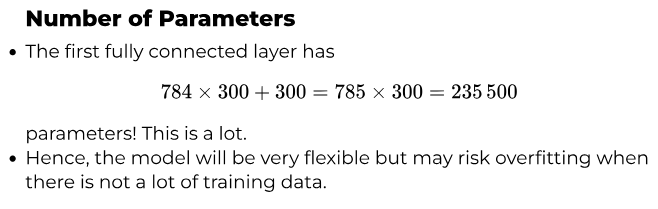

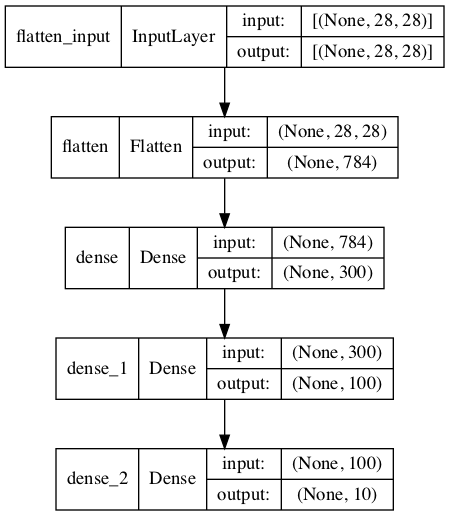

## compile the model


- Use rmsprop as the optimizer with all the default parameter settings.
- Specify the correct loss for a binary classification problem
- Track the accuracy metric.

In [ ]:
optimizer = tf.keras.optimizers.RMSprop()

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

OF

- Create an SGD optimizer with a learning rate of 1e-2.
- compile the model.
  - Use the appropriate loss function for multiclass classification, also taking into account that the labels are not one-hot encoded.
  - Track the accuracy metric.

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

## fit/train the model

Use a batch size of 256.
- Train the model for alargenumber of epochs but use the EarlyStoppingCallback to stop training when the validation accuracy has not improved for 5 epochs.
- Also use the ModelCheckpoint callback to save the model with the best validation loss

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=5, restore_best_weights=True,
    monitor='val_loss')

model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "check_points", save_best_only=True)

 - Use theTensorBoardcallback to log the training process.

In [ ]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

tensorboard_cb = tf.keras.callbacks.TensorBoard(
    run_logdir,
    profile_batch=(100,200),
)

In [ ]:
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    batch_size=256,
                    epochs=5000,
                    callbacks=[early_stopping_cb, model_checkpoint_cb, tensorboard_cb])

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

OF

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data =(X_val, y_val),
    epochs=20,
    batch_size=512
)

### plot learning curves

In [ ]:
def plot_learning_curves(history):
    plt.figure(figsize=(8, 5))
    for key, style in zip(history.history, ["r-o", "r-*", "b-o", "b-*"]):
        epochs = np.array(history.epoch)
        plt.plot(epochs + 1, history.history[key], style, label=key)
    plt.xlabel("Epoch")
    plt.axis([1, len(history.history['loss']), 0., 1])
    plt.legend(loc="lower left")
    plt.grid()

In [ ]:
plot_learning_curves(history)

## Evaluate the model

Use the evaluate method to evaluate the model on the test set

In [ ]:
model.evaluate(X_test, y_test, batch_size=512)

In [ ]:
y_test_pred = model(X_test).numpy()

We can thus find the reviews that the model is most confidently wrong about by looking for the reviews with the highest losses.

In [ ]:
def find_confidently_wrong(y_true, y_pred, top=10):
    """
    y_true: the true labels (0/1). Shape (n, 1)
    y_pred: the predictions (floats). Shape(n, 1)

    Returns: list of indices, such that these indices have the highest loss (and they are actually misclassified)
    """
    assert len(y_true.shape) == len(y_pred.shape) == 2, "Rank should be 2"
    assert y_true.shape[0] == y_pred.shape[0], "Not the same length"
    assert y_true.shape[1] == y_pred.shape[1] == 1, "Second dimension should be 1"
    bce = tf.keras.losses.BinaryCrossentropy(reduction=tf.keras.losses.Reduction.NONE)

    losses = bce(y_true, y_pred).numpy()
    high_losses_indices = np.argsort(losses)[-top:]
    high_losses_indices = list(high_losses_indices)[::-1] # reverse it, so that highest loss is first

    y_pred_labels = np.where(y_pred > 0.5, 1, 0)
    return [idx for idx in high_losses_indices if y_true[idx] != y_pred_labels[idx]]


You can then use the following code to print the top 10 reviews that the modelis most confidently wrong about:

In [ ]:
import pprint

y_test_true = y_test.reshape(-1,1)
for idx in find_confidently_wrong(y_test_true, y_test_pred, top=10):
    actual_sentiment = 'POSITIVE' if y_test_true[idx][0] == 1 else 'NEGATIVE'
    predicted_sentiment = 'POSITIVE' if y_test_pred[idx][0] > 0.5 else 'NEGATIVE'
    # Add 10_000 because we used the first 10_000 elements as validation data
    pprint.pprint(convert_to_english(test_data[10_000 + idx]), width=80)
    print(f"is a {actual_sentiment} review but is was classified as {predicted_sentiment}.")
    print("**************************************")

---

In [ ]:
model.evaluate(x_train, y_train, batch_size=512)

In [ ]:
model.evaluate(x_val, y_val, batch_size=512)

In [ ]:
model.evaluate(x_test, y_test, batch_size=512)

## Try different learning rates

In [ ]:
def get_run_logdir(root_logdir="my_logs", lr=None, batch_size=None):
    lr_string = "" if lr is None else "_lr_" + str(lr)
    batch_size_string = "" if batch_size is None else "_batch_size_" + str(batch_size)
    return Path(root_logdir) / (strftime("run_%Y_%m_%d_%H_%M_%S") + lr_string + batch_size_string)

In [ ]:
models = dict()
for lr in [0.01, 0.05, 0.1, 0.5]:
    for batch_size in [64, 128, 256, 512]:
        tf.keras.backend.clear_session()
        model = get_model()
        optimizer = tf.keras.optimizers.SGD(learning_rate=lr)

        model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'],
        )
        run_logdir = get_run_logdir(lr=lr, batch_size=batch_size)

        tensorboard_cb = tf.keras.callbacks.TensorBoard(
            run_logdir,
            profile_batch=(100,200),
        )

        history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    batch_size=256,
                    epochs=5000,
                    callbacks=[early_stopping_cb, tensorboard_cb],
                    verbose=0)

        models[(lr, batch_size)] = model

        print(f"Trained model for {lr} with batch_size {batch_size}")


In [ ]:
# Find the best model
best_acc = 0.0
best_model = None
best_key = None
for key, model in models.items():
    acc = model.evaluate(x_val, y_val,verbose=0)[1]
    if acc > best_acc:
        best_acc = acc
        best_model = model
        best_key = key

best_key, best_acc

In [ ]:
best_model.evaluate(x_val, y_val)

In [ ]:
# Evaluate the best model on the test set
best_model.evaluate(x_test, y_test)

# Loading and preprocessing data with tensorflow

In [ ]:
import os
import shutil
import random

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


## Reading the raw data

In [ ]:
file_path = tf.keras.utils.get_file(
  origin="https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
  extract=True,
  cache_dir="."
)

## create a val directory

The dataset as downloaded contains 25000 train and 25000 test examples, with 12500 positive and negative reviews in each set. We are going to use all 25000 examples for training, but we are going to use 15000 of the examples in the test directory for validation. To be more specific, we are going to use 7500 positive and 7500 negative reviews for validation.

Note: you could do this outside of Python, but we are going to use Python inthis exercise.
- Create directories called val/neg and val/pos next to the existing train and test directories. Look u pos.makedirs for this.
- Use os.listdir to get the list of files in the test/neg directory. Use random.shuffle to shuffle this list. Use shutil.move to move the first 7500 files to the val/neg directory. Next, do the same for the test/pos directory

In [ ]:
# Create validation directories
os.makedirs("datasets/aclImdb/val/pos", exist_ok=True)
os.makedirs("datasets/aclImdb/val/neg", exist_ok=True)

In [ ]:
neg_reviews = os.listdir("datasets/aclImdb/test/neg")
random.shuffle(neg_reviews)
pos_reviews = os.listdir("datasets/aclImdb/test/pos")
random.shuffle(pos_reviews)

# Use assert to prevent moving files twice
assert len(neg_reviews) == 12500 and len(pos_reviews) == 12500
for file_name in neg_reviews[:7500]:
  shutil.move("datasets/aclImdb/test/neg/" + file_name,
              "datasets/aclImdb/val/neg/")

for file_name in pos_reviews[:7500]:
  shutil.move("datasets/aclImdb/test/pos/" + file_name,
              "datasets/aclImdb/val/pos/")

## create tf.data.Dataset objects

### optie 1
se the fact that we still have ‘small’ data, and use pure Python code to load all the reviews into the main memory and then use from_tensor_slices to create the tf.data.Dataset objects.

In [ ]:
def create_dataset_1(base_dir):
  # Approach 1: read all reviews into a list and use from_tensor_slices.
  # base_dir: directory name like "./datasets/aclImdb/train"
  reviews = []
  sentiments = []
  for sentiment in ["pos", "neg"]:
    directory = os.path.join(base_dir, sentiment)
    for file_path in os.listdir(directory):
      with open(os.path.join(directory, file_path), "r") as file:
        reviews.append(file.readlines())
      sentiments.append(1.0 if sentiment == "pos" else 0.0)

  return tf.data.Dataset.from_tensor_slices((reviews, sentiments))

In [ ]:
for X, y in create_dataset_1("./datasets/aclImdb/test").take(3):
    print(X)
    print(y)
    print("*"*50)

### optie 2
use the TextLineDataset to read the reviews from the files directly. This is a bit more complicated, but it is more scalable. You can use the following code to read the reviews from the files:

In [ ]:
def create_dataset_2(base_dir):
  pos_file_paths = [os.path.join(base_dir, "pos", f) for f in os.listdir(os.path.join(base_dir, "pos"))]
  neg_file_paths = [os.path.join(base_dir, "neg", f) for f in os.listdir(os.path.join(base_dir, "neg"))]

  pos_ds = tf.data.TextLineDataset(pos_file_paths, num_parallel_reads=4).map(lambda review : (review, 1.0))
  neg_ds = tf.data.TextLineDataset(neg_file_paths, num_parallel_reads=4).map(lambda review : (review, 0.0))

  return pos_ds.concatenate(neg_ds)

In [ ]:
for X, y in create_dataset_2("./datasets/aclImdb/test").take(3):
    print(X)
    print(y)
    print("*"*50)

In [ ]:
%timeit -r1 for X, y in create_dataset_1("./datasets/aclImdb/train"): pass

8.84 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%timeit -r1 for X, y in create_dataset_2("./datasets/aclImdb/train"): pass

10.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Finally, create the actual dataset objects that will be used to train the model.We need to shuffle the training data (but not the validation nor the test data).All datasets need to be batched. Use a batch size of 512 (but make this easily changeable). Use prefetching on all datasets

In [ ]:
BATCH_SIZE=512
train_ds = (
    create_dataset_2("./datasets/aclImdb/train").
    shuffle(buffer_size=15_000, seed=42).
    batch(BATCH_SIZE).
    prefetch(1)
)
val_ds = (
    create_dataset_2("./datasets/aclImdb/val").
    batch(BATCH_SIZE).
    prefetch(1)
)
test_ds = (
    create_dataset_2("./datasets/aclImdb/test").
    batch(BATCH_SIZE).
    prefetch(1)
)

## create and train a model with a multi-hot encoding

Use the TextVectorizationlayer to convert the reviews to multi-hot encoded sequences. The vocabulary should be limited to 10,000 tokens

In [ ]:
VOCAB_SIZE=10_000
multi_hot_layer = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode="multi_hot"
)
multi_hot_layer.adapt(train_ds.map(lambda review, sentiment : review))


In [ ]:
multi_hot_layer(["This movie was great", "Terrible!"])




```
<tf.Tensor: shape=(2, 10000), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>
```



In [ ]:
def get_model(conversion_layer):
    model = tf.keras.Sequential()

    model.add(conversion_layer)

    model.add(tf.keras.layers.Dense(units=16, activation='relu',
                                    kernel_initializer="he_uniform"))
    model.add(tf.keras.layers.Dense(units=16, activation='relu',
                                    kernel_initializer="he_uniform"))
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    return model

In [ ]:
model = get_model(multi_hot_layer)

In [ ]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.001,
    patience=5,
    restore_best_weights=True
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=100,
    callbacks=[early_stopping],
)

In [ ]:
model.evaluate(val_ds)

## create and train a model with a TF-IDF encoding

In [ ]:
tf_idf_layer = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode="tf_idf"
)
tf_idf_layer.adapt(train_ds.map(lambda review, sentiment : review))

In [ ]:
model2 = get_model(tf_idf_layer)
model2.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history = model2.fit(
    train_ds,
    validation_data = val_ds,
    epochs=100,
    callbacks=[early_stopping],
)

In [ ]:
model2.evaluate(val_ds)

In [ ]:
model2.summary()

## create a Custom Embedding Layer

In [ ]:
int_layer = tf.keras.layers.TextVectorization(
    max_tokens = VOCAB_SIZE,
    output_mode = 'int'
)
int_layer.adapt(train_ds.map(lambda review, sentiment : review))
int_layer(['It was a terrible movie', "Super!"])

<tf.Tensor: shape=(2, 5), dtype=int64, numpy=
array([[   9,   14,    4,  384,   18],
       [1566,    0,    0,    0,    0]])>

In [ ]:
class MeanEmbeddingLayer(tf.keras.layers.Layer):

  def __init__(self, input_dim, output_dim, **kwargs):
    super().__init__(**kwargs)
    self.input_dim = input_dim
    self.output_dim = output_dim
    self.embedding_layer = tf.keras.layers.Embedding(
        input_dim=self.input_dim,
        output_dim=self.output_dim
    )

  def call(self, ints):
    ## ints should be (batch_size, max_sequence_length)

    #  multiplier.shape -> (ints.shape[0], self.output_dim, 1)
    multiplier = tf.expand_dims(tf.where(ints != 0, 1.0, 0.0), -1)


    # scale_factor.shape -> (ints.shape[0], 1),
    scale_factor = tf.math.sqrt(
        tf.math.count_nonzero(
            ints, axis=-1, keepdims=True, dtype=tf.dtypes.float32)
        )
    # word_embedding.shape -> batch_size, max_seq_length, output_dim)
    word_embeddings = self.embedding_layer(ints)

    # unscaled_sum.shape -> (ints.shape[0], self.output_dim)
    unscaled_sum = tf.reduce_sum(word_embeddings * multiplier, axis=-2)

    return unscaled_sum / scale_factor

  def get_config(self):
        base_config = super().get_config()
        return {**base_config, "input_dim": self.input_dim,
                               "output_dim": self.output_dim}

In [ ]:
def get_model_with_embedding(vectorization_layer, output_dim):
  # vectorization layer should be a TextVectorization layer
  # output_dim is the dimensionality of the embedding vectors

  model = tf.keras.Sequential()

  model.add(vectorization_layer)

  model.add(MeanEmbeddingLayer(len(vectorization_layer.get_vocabulary()),
                               output_dim))

  model.add(tf.keras.layers.Dense(units=16, activation='relu',
                                  kernel_initializer="he_uniform"))
  model.add(tf.keras.layers.Dense(units=16, activation='relu',
                                  kernel_initializer="he_uniform"))
  model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

  return model

In [ ]:
int_layer = tf.keras.layers.TextVectorization(
    max_tokens = VOCAB_SIZE,
    output_mode = 'int'
)
int_layer.adapt(train_ds.map(lambda review, sentiment : review))

In [ ]:
model3 = get_model_with_embedding(int_layer, output_dim=16)
model3.summary()

In [ ]:
model3.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history = model3.fit(
    train_ds,
    validation_data = val_ds,
    epochs=100,
    callbacks=[early_stopping],
)

In [ ]:
model3.evaluate(val_ds)

In [ ]:
model3.evaluate(test_ds)

# Cifar10

In this exercise we are going to classify images of airplanes, automobiles, birds,cats, deers, dogs, frogs, horses, ships and trucks using GoogLeNet.

Note: we will be working with a large convolutional network. Makesure to have a GPU enabled or training will be painfully slow. If youare using Google Colab, make sure to select a GPU runtime.

## Load the data

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

How many examples do the training set and test set contain?

In [ ]:
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

We will use the last 10000 examples from the training set as our validationset. The other examples will be used as training set. Write code to createthe validation and training data.

In [ ]:
X_train, X_valid = X_train_full[:-10000], X_train_full[-10000:]
y_train, y_valid = y_train_full[:-10000], y_train_full[-10000:]

## data exploration

Give the number of samples for each category

In [ ]:
import numpy as np
np.unique(y_train[X_train], return_counts=True)

Show the first 25 examples in a 5 by 5 grid, each time showing the class(label) of each example along with the image

In [ ]:
class_names = (['airplane', 'automobile', 'bird', 'cat', 'deer'] +
   ['dog', 'frog', 'horse', 'ship', 'truck']
)

plt.figure(figsize=(10,10))

for i in range(25):
  ax = plt.subplot(5, 5, i + 1)
  plt.imshow(X_train[i])
  plt.title(f"{class_names[y_train[i][0]]}")
  plt.axis("off")

## build a model

- A Rescalinglayer which rescales the inputs (that are now between 0and 255) to the range[0,1].
- A Convolutional layer with 32 filters, kernel size equal to (3, 3),padding=same and the relu activation function
- A Convolutional layer with 32 filters, kernel size equal to (3, 3),padding=same and the relu activation function
- A max pooling layer with pool size equal to (2, 2).
- A Convolutional layer with 64 filters, kernel size equal to (3, 3),padding=same nd the relu activation function
- A Convolutional layer with 64 filters, kernel size equal to (3, 3),padding=same and the relu activation function
- A max pooling layer with pool size equal to (2, 2).
- A Flattenlayer that transforms the tensors to 1 long 1D tensor
- A Denselayer with 128 units and the relu activation function.
- A Dense output layer.

∗ How many units should this layer have

In [ ]:
# Define a convolutional layer with default parameters
DefaultConv2D = functools.partial(tf.keras.layers.Conv2D,
    kernel_size=(3,3),
    strides=(1,1),
    activation='relu',
    padding='same'
)

tf.keras.backend.clear_session()
def get_model():
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Rescaling(scale=1./255, input_shape=(32,32,3)))

  model.add(DefaultConv2D(filters=32))
  model.add(DefaultConv2D(filters=32))
  model.add(tf.keras.layers.MaxPool2D(pool_size=2))

  model.add(DefaultConv2D(filters=64))
  model.add(DefaultConv2D(filters=64))
  model.add(tf.keras.layers.MaxPool2D(pool_size=2))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(units=128, activation='relu'))
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

  return model

In [ ]:
model = get_model()
model.summary()

## compile the model

Specify the correct loss for this classification problem. = sparse_categorical_crossentropy

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## train/fit the model

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.001,
    patience=5,
    restore_best_weights=True
)

history = model.fit(X_train, y_train,
          validation_data=(X_valid, y_valid),
          epochs=100,
          batch_size=32,
          callbacks=[early_stopping]
          )

## evaluate the model

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
model.evaluate(X_valid, y_valid)

- Create an array predictions with the prediction according to the model.

Note: the predict method returns 3 probabilities for each image, i.e. one probability per class.
- Now go over the test set and compare the predicted labels with the expected labels.  When there is a difference between predicted and expected label,  you add the image to a list incorrect_predicted_images and you collect the correct and (incorrectly) predicted labels in two lists expected_labels and predicted_labels

In [ ]:
def evaluate_model(X, predictions, y_true):
  # X (n, image_shape): the images
  # predictions made by the model (n, #num_classes)
  # y_true: actual labels (n, 1)

  # Returns: three lists
  # incorrectly_classified_images, predicted_labels, expected_labels

  assert X.shape[0] == predictions.shape[0] == y_true.shape[0], "dimensions wrong"

  incorrectly_classified_images = []
  expected_labels = []
  predicted_labels = []

  y_predicted = np.argmax(predictions, axis=-1)

  for i in range(y_true.shape[0]):
    if y_predicted[i] != y_true[i]:
      incorrectly_classified_images.append(X[i])
      expected_labels.append(y_true[i,0])
      predicted_labels.append(y_predicted[i])

  return incorrectly_classified_images, predicted_labels, expected_labels

In [ ]:
y_test_predictions = model.predict(X_test)

In [ ]:
incorrectly_classified_images, predicted_labels, expected_labels = (
    evaluate_model(X_test, y_test_predictions, y_test)
)

In [ ]:
y_test_class_predictions = np.argmax(y_test_predictions, axis=-1)
y_test_class_predictions.shape

In [ ]:
y_test.shape

### confusionmatrix

In [ ]:
# Create a confusion matrix using tensorflow
cm = tf.math.confusion_matrix(y_test.squeeze(), y_test_class_predictions)

In [ ]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cbar=False);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(class_names,  rotation=-45);
ax.yaxis.set_ticklabels(class_names, rotation=0);

In [ ]:
# Sanity check that the labels on the confusion matrix are correct
my_cm = np.zeros(shape=(10,10),dtype=np.int32)
for (true_label, pred_label) in zip(y_test.squeeze(), y_test_class_predictions):
  my_cm[true_label, pred_label] += 1

my_cm

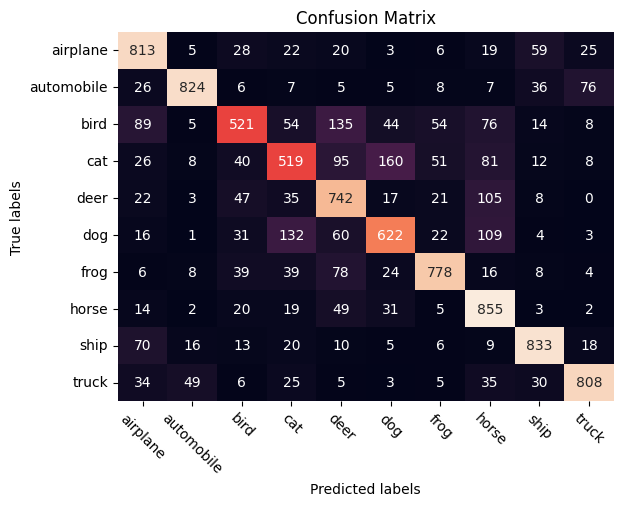

output:

In [ ]:
array([[813,   5,  28,  22,  20,   3,   6,  19,  59,  25],
       [ 26, 824,   6,   7,   5,   5,   8,   7,  36,  76],
       [ 89,   5, 521,  54, 135,  44,  54,  76,  14,   8],
       [ 26,   8,  40, 519,  95, 160,  51,  81,  12,   8],
       [ 22,   3,  47,  35, 742,  17,  21, 105,   8,   0],
       [ 16,   1,  31, 132,  60, 622,  22, 109,   4,   3],
       [  6,   8,  39,  39,  78,  24, 778,  16,   8,   4],
       [ 14,   2,  20,  19,  49,  31,   5, 855,   3,   2],
       [ 70,  16,  13,  20,  10,   5,   6,   9, 833,  18],
       [ 34,  49,   6,  25,   5,   3,   5,  35,  30, 808]], dtype=int32)

# transfer learning

Load the dataset using tensorflow_datasets. We will use the first 50% of the test set as our validation set, the last 50% of the test will be used as our test set. We will use the complete training set for training. Verify that your datasets have the following sizes:
- Training set: 3060
- Validation set: 3042
- Test set: 3042

Note: in this exercise we will not convert the Datasets to numpy arrays. We will use the Datasets directly.

In [ ]:
(train_ds, validation_ds, test_ds), info = tfds.load(
    "caltech101",
    split=["train", "test[:50%]", "test[50%:]"],
    as_supervised=True,
    with_info=True
)

In [ ]:
# Check sizes of datasets
print(train_ds.cardinality())
print(validation_ds.cardinality())
print(test_ds.cardinality())

In [ ]:
print(f"Description: {info.description}")

In [ ]:
# check datatype
for image, label in train_ds.take(1):
  print(f"{image.dtype}, {label.dtype}")

## some data exploration

Show the first nine image of the training set in a 3×3 grid.
- Print the label and the size of the image on top of each image.

In [ ]:
# Show some examples
plt.figure(figsize=(10,10))

for i, (image, label) in enumerate(train_ds.take(9)):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image)
  plt.title(f"{int(label)}, shape: {image.shape}")
  plt.axis("off")

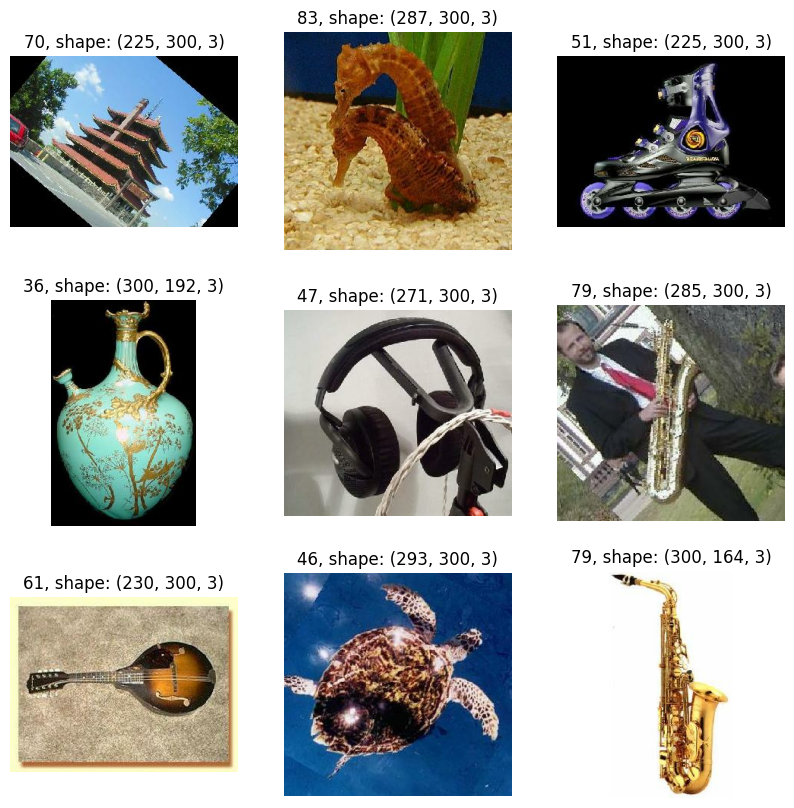

In [ ]:
# Resize the images
IMAGE_SIZE=(224,224)
def resize(image, height=224, width=224):
  return tf.keras.layers.Resizing(height, width)(image)

train_ds = train_ds.map(lambda image, label : (resize(image), label))
validation_ds = validation_ds.map(lambda image, label : (resize(image), label))
test_ds = test_ds.map(lambda image, label : (resize(image), label))

In [ ]:
# Toon sommige afbeeldingen opnieuw. Merk op. Resizing layer retourneert floats en dat
# vindt imshow by default niet leuk
plt.figure(figsize=(10,10))

for i, (image, label) in enumerate(train_ds.take(9)):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image.numpy().astype(np.int32))
  plt.title(f"{int(label)}, shape: {image.shape}")
  plt.axis("off")

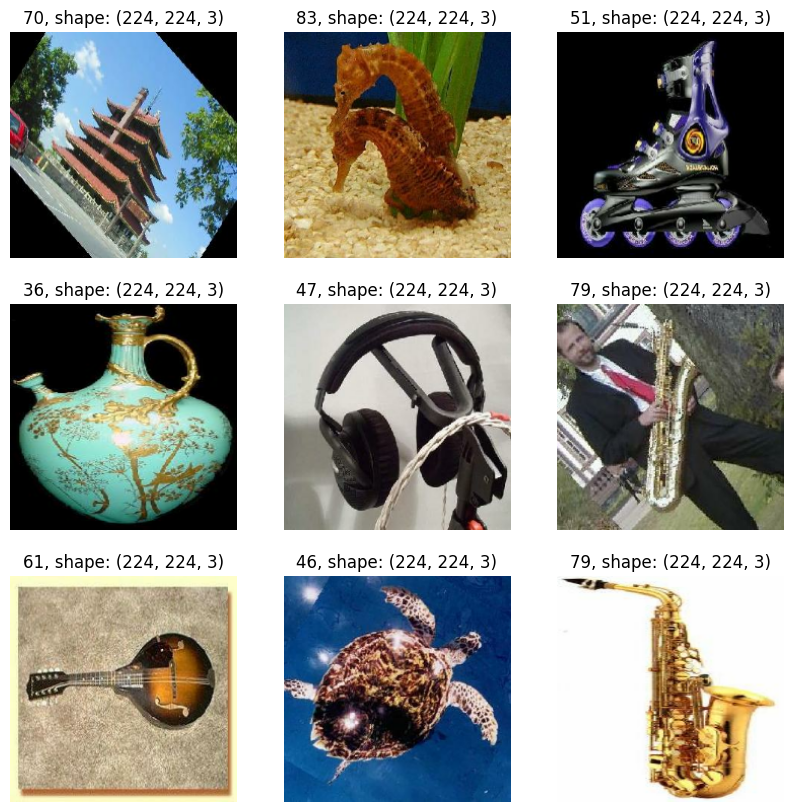

## preprocess the data

- the images are preprocessed for the MobileNetV2 model. Use the prepro-cessing function tf.keras.applications.mobilenet_v2.preprocess_input for this.
- batch the images in batches of size 32
- shuffle the training set. There is no need to shuffle the validation and testset.
- Use the prefetch method on the training Dataset to prefetch the next batch while training.

In [ ]:
# We willen mobile net V2 gebruiken.
# Batch de dataset (batch_size = 32)
# Pas de gepaste preprocessing functie toe op alle elementen van de dataset.
# Shuffle de training data
preprocess = tf.keras.applications.mobilenet_v2.preprocess_input

BATCH_SIZE=32
train_ds = (train_ds
    .map(lambda x, y : (preprocess(x), y))
    .shuffle(1000, seed=42)
    .batch(BATCH_SIZE)
    .prefetch(1)
)
validation_ds = (validation_ds
    .map(lambda x, y : (preprocess(x), y))
    .batch(BATCH_SIZE)
)
test_ds = (test_ds
    .map(lambda x, y : (preprocess(x), y))
    .batch(BATCH_SIZE)
)

## apply data augmentation

- each image is randomly flipped horizontally (or not)
- each image is randomly rotated by a random angle that is between
- 20and+20degrees. Pixels that are not part of the original image are filledwith the value 0.
  - Note: you will need to determine the appropriate value for thefactorparameter.
- a random zoom is applied to each image. Each image is randomly zoomedin or out by at most 15%. Pixels that are not part of the original imageare filled with the value 0

In [ ]:
# Apply data data augmentation
# Random horizontal flip
# Random small rotation
# Random zoom
data_augmentation = tf.keras.Sequential(
    [tf.keras.layers.RandomFlip("horizontal"),
     tf.keras.layers.RandomRotation(20/360, fill_mode='constant'),
     tf.keras.layers.RandomZoom(height_factor=(-0.15,0.15), fill_mode="constant"),
    ]
)

In [ ]:
# Bekijk voorbeelden van afbeeldingen die augmented zijn.
for images, labels in validation_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[2]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow( (augmented_image[0].numpy() + 1)/2)
        plt.title(int(labels[0]))
        plt.axis("off")

## Load the base model

- Do not include the top layer as we want to classify 102 classes instead ofthe 1000 classes for which the model was originally trained.
- Make sure to load the model with theimagenetweights.
- Tell the model that we will use the images of size 224×224 with 3 channels

In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(*IMAGE_SIZE, 3),
    include_top=False,
    weights="imagenet",
)

In [ ]:
# Vind de vorm van de laatste laag door eenvoudigweg een batch door het model
# te jagen en te kijken naar de shape
for batch, label in train_ds.take(1):
  print(base_model(batch).shape)

In [ ]:
base_model.trainable=False

Using the functional API, create a new model that - Starts with the data augmentation layer you created earlier. - Passes the augmented images through the MobileNetV2 base model. - Applies global average pooling to the results ofthe base model. - Adds a dropout layer with a dropout rate of 0.4. - Finishes with a fully connected layer. - Use the correct number of units. - Use the correct activation function

In [ ]:
input_ = tf.keras.layers.Input(shape=(*IMAGE_SIZE, 3))
x = data_augmentation(input_)
x = input_
x = base_model(x, training=False) # Add training = False
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(rate=0.4)(x)
output = tf.keras.layers.Dense(units=102, activation='softmax')(x)
model = tf.keras.Model(inputs=[input_], outputs=[output])

In [ ]:
model.summary()

## train the top layer of the model

Compile the model using - the Adam optimizer with a learning rate of 0.001. -the correct loss function - the accuracy as the metric to track.Fit the model, for 100 epochs. To prevent the model from overfitting too much,use an EarlyStopping callback with a patience of 3.  Track the validation accuracy. Only consider improvements of at least 0.1% to be worthwhile.

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)

In [ ]:
model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=3,
    min_delta=0.001,
    restore_best_weights=True
)

In [ ]:
history = model.fit(train_ds, validation_data=validation_ds,
                    epochs=100,
                    callbacks=[early_stopping])

In [ ]:
base_model.summary()

## fine-tuning the model

In [ ]:
# Find index of "block_13_expand"
[layer.name for layer in base_model.layers].index("block_13_expand")

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:116]:
  layer.trainable = False

In [ ]:
fine_tuning_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)

In [ ]:
model.compile(
    optimizer=fine_tuning_optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
model.summary()

In [ ]:
history = model.fit(train_ds, validation_data=validation_ds,
                    epochs=100,
                    callbacks=[early_stopping])

## evaluate the model

In [ ]:
model.evaluate(test_ds)

## Calculate Top-1, Top-3 and Top-5 Accuracy

Competitions like ImageNet are often scored using something like the top-5 (or top-3) accuracy. Use the tf.keras.metrics.SparseTopKCategoricalAccuracyclass to deter-mine the top-1, top-3 and top-5 accuracy on the test set. (Results of90.6%,97.1% and 98.6% respectively are achievable.) You will need to recompile the model (and track the appropriate metrics) prior to calling evaluate once more

In [ ]:
top5 = tf.keras.metrics.SparseTopKCategoricalAccuracy(k=5, name="top5")
top3 = tf.keras.metrics.SparseTopKCategoricalAccuracy(k=3, name="top3")

In [ ]:
model.compile(
    optimizer=fine_tuning_optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy", top3, top5]
)

In [ ]:
model.evaluate(test_ds)

# Cifar10 met GoogLeNet

## load the data

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
X_train, X_valid = X_train_full[:-10000], X_train_full[-10000:]
y_train, y_valid = y_train_full[:-10000], y_train_full[-10000:]

### rescaling image size

The original images are 32 by 32 pixels. We will resize them to 128 by 128 pixels prior to feeding them to the network

In [ ]:
HEIGHT = 128
WIDTH = 128

In [ ]:
preprocess_layer = tf.keras.Sequential([
    tf.keras.layers.Resizing(HEIGHT, WIDTH, input_shape=(32,32,3)),
    tf.keras.layers.Rescaling(scale=1/127.5, offset=-1)
])

In [ ]:
tf.keras.backend.clear_session()
model = get_googlenet_model(
    input_shape=(128,128,3), num_classes=10,
    use_batch_norm=False,
    name="GoogLeNet")
model.summary()
full_model = tf.keras.Sequential([
    preprocess_layer,
    model
])

In [ ]:
full_model.summary()

## data exploration

In [ ]:
import numpy as np
np.unique(y_train[X_train], return_counts=True)

In [ ]:
class_names = (['airplane', 'automobile', 'bird', 'cat', 'deer'] +
   ['dog', 'frog', 'horse', 'ship', 'truck']
)

plt.figure(figsize=(10,10))

for i in range(25):
  ax = plt.subplot(5, 5, i + 1)
  plt.imshow(X_train[i])
  plt.title(f"{class_names[y_train[i][0]]}")
  plt.axis("off")

## build a model

In [ ]:
from warnings import filters
from keras.src.layers.serialization import activation
import functools
import tensorflow as tf


DefaultConv = functools.partial(
    tf.keras.layers.Convo2D, kernel_size=(1,1), strides=(1,1),
                            padding="same",activation="relu")

class InceptionModule(tf.keras.layers.Layer):
  def __init__(self,filters11, filters33_reduce,filters33,
               filters55_reduce,filters55,filters_pool_proj,
               use_batch_norm=True, **kwargs):
    super().__init__(**kwargs)
    self.conv11= DefaultConv(filters=filters11)
    self.conv33_reduce=DefaultConv(filters=filters33_reduce)
    self.conv33 = DefaultConv(filters=filters33,kernel_size=(3,3))
    self.conf55_reduce= DefaultConv(filters=filters55_reduce)
    self.conf55= DefaultConv(filters= filters55,kernel_size=(5,5))
    self.maxpool = tf.keras.layers.MaxPool2D(pool_size=(3,3),padding="same")
    self.filterspool = DefaultConv(filters=filters_pool_proj)

    if use_batch_norm:
      self.batchnorm=tf.keras.layers.BatchNormalization()

  def call(self,inputs):
    path1  = self.conv11(inputs)
    path2 = self.conv33_reduce(inputs)
    path2 = self.conv33(path2)
    path3 = self.conv55_reduce(inputs)
    path3 = self.conv55(path3)
    path4 = self.maxpool(inputs)
    path4 = self.filterspool(path4)

    concatenation = tf.keras.layers.concatenate([path1, path2, path3, path4])

    return self.batch_norm(concatenation) if self.use_batch_norm else concatenation


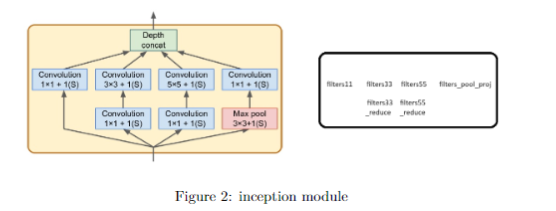

## test the first inception module form the googlenet

In [ ]:
test_inception = InceptionModule(filters11=64, filters33_reduce=96, filters33=128, filters55_reduce=16, filters55=32, filters_pool_proj=32, use_batch_norm=False)

In [ ]:
test_arr = tf.constant(0.0, shape=(1, 16, 16, 192))

In [ ]:
test_inception(test_arr).shape

## Implement the whole model

In [ ]:
DefaultMaxPool = functools.partial(
    tf.keras.layers.MaxPool2D,pool_size=(3,3), strides=(2,2), padding='same')

DefaultConv = functools.partial(
    tf.keras.layers.Conv2D, kernel_size=(1, 1), strides=(1, 1),
    padding="same", activation="relu"
)

def get_googlenet_model(input_shape, num_classes, use_batch_norm=True, **kwargs):
  model = tf.keras.Sequential(**kwargs)
  model.add(DefaultConv(filters=64, kernel_size=(7, 7), strides=(2, 2), input_shape=input_shape))

  if use_batch_norm:
    model.add(tf.keras.layers.BatchNormalization())

  model.add(DefaultMaxPool())

  model.add(DefaultConv(filters=64))
  model.add(DefaultConv(filters=192, kernel_size=(3, 3)))

  if use_batch_norm:
    model.add(tf.keras.layers.BatchNormalization())

  model.add(DefaultMaxPool())

  model.add(InceptionModule(filters11=64, filters33_reduce=96, filters33=128, filters55_reduce=16, filters55=32, filters_pool_proj=32, use_batch_norm=use_batch_norm))
  model.add(InceptionModule(filters11=128, filters33_reduce=128, filters33=192, filters55_reduce=32, filters55=96, filters_pool_proj=64, use_batch_norm=use_batch_norm))

  model.add(DefaultMaxPool())

  model.add(InceptionModule(filters11=192, filters33_reduce=96, filters33=208, filters55_reduce=16, filters55=48, filters_pool_proj=64, use_batch_norm=use_batch_norm))
  model.add(InceptionModule(filters11=160, filters33_reduce=112, filters33=224, filters55_reduce=24, filters55=64, filters_pool_proj=64, use_batch_norm=use_batch_norm))
  model.add(InceptionModule(filters11=128, filters33_reduce=128, filters33=256, filters55_reduce=24, filters55=64, filters_pool_proj=64, use_batch_norm=use_batch_norm))
  model.add(InceptionModule(filters11=112, filters33_reduce=144, filters33=288, filters55_reduce=32, filters55=64, filters_pool_proj=64, use_batch_norm=use_batch_norm))
  model.add(InceptionModule(filters11=256, filters33_reduce=160, filters33=320, filters55_reduce=32, filters55=128, filters_pool_proj=128, use_batch_norm=use_batch_norm))

  model.add(DefaultMaxPool())

  model.add(InceptionModule(filters11=256, filters33_reduce=160, filters33=320, filters55_reduce=32, filters55=128, filters_pool_proj=128, use_batch_norm=use_batch_norm))
  model.add(InceptionModule(filters11=384, filters33_reduce=192, filters33=384, filters55_reduce=48, filters55=128, filters_pool_proj=128, use_batch_norm=use_batch_norm))

  model.add(tf.keras.layers.GlobalAveragePooling2D())

  model.add(tf.keras.layers.Dropout(rate=0.4))

  model.add(tf.keras.layers.Dense(units=num_classes, activation='softmax'))

  return model

In [ ]:
preprocess_layer = tf.keras.Sequential([
    tf.keras.layers.Resizing(HEIGHT, WIDTH, input_shape=(32,32,3)),
    tf.keras.layers.Rescaling(scale=1/127.5, offset=-1)])

tf.keras.backend.clear_session()

model = get_googlenet_model(input_shape=(128,128,3), num_classes=10,use_batch_norm=False, name="GoogLeNet")
model.summary()

if the parameter "name" is not passed, the model will get the name "sequential" but the functionality would not be different

In [ ]:
full_model = tf.keras.Sequential([preprocess_layer, model])

## compile the model

In [ ]:
full_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics='accuracy'
)

## train the model

### one hot encode the labels

In [ ]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
y_validation_one_hot = tf.keras.utils.to_categorical(y_validation, 10)

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(restore_best_weights=True)
batch_size=128

history = full_model.fit(X_train, y_train_one_hot, epochs=100, batch_size=batch_size, validation_data=(X_validation, y_validation_one_hot), callbacks=[early_stopping_cb])

## evaluate the model

In [ ]:
import numpy as np

def plot_learning_curves(history):
    plt.figure(figsize=(8, 5))
    for key, style in zip(history.history, ["r-o", "r-*", "b-o", "b-*"]):
        epochs = np.array(history.epoch)
        plt.plot(epochs + 1, history.history[key], style, label=key)
    plt.xlabel("Epoch")
    plt.axis([1, len(history.history['loss']), 0., 1])
    plt.legend(loc="lower left")
    plt.grid()

In [ ]:
plot_learning_curves(history)

In [ ]:
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)

full_model.evaluate(X_test, y_test_one_hot)

# working with timeseries_dataset_from_array and window

## window and timeseries

### task 1
Use tf.keras.utils.timeseries_dataset_from_array to
- chop the data into 10 non-overlapping windows of length 10
- the resulting dataset should contain individual items

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
# Some artificial univariate time series data
data = np.arange(0,100)

In [ ]:
# Use tf.keras.utils.timeseries_dataset_from_array to
# - chop the data into 10 non-overlapping windows of length 10
# - the resulting dataset should contain individual items
ds1 = tf.keras.utils.timeseries_dataset_from_array(
    data,
    targets=None,
    sequence_length=10,
    sequence_stride=10,
    batch_size=None
)

In [ ]:
for item in ds1:
    print(f"{item} {item.shape}")
    print("*"*50)

[0 1 2 3 4 5 6 7 8 9] (10,)
**************************************************
[10 11 12 13 14 15 16 17 18 19] (10,)
**************************************************
[20 21 22 23 24 25 26 27 28 29] (10,)
**************************************************
[30 31 32 33 34 35 36 37 38 39] (10,)
**************************************************
[40 41 42 43 44 45 46 47 48 49] (10,)
**************************************************
[50 51 52 53 54 55 56 57 58 59] (10,)
**************************************************
[60 61 62 63 64 65 66 67 68 69] (10,)
**************************************************
[70 71 72 73 74 75 76 77 78 79] (10,)
**************************************************
[80 81 82 83 84 85 86 87 88 89] (10,)
**************************************************
[90 91 92 93 94 95 96 97 98 99] (10,)
**************************************************


OF

In [ ]:
# Same exercise using `window`. Start with tf.data.Dataset.range(100)
ds1_window = tf.data.Dataset.range(100).window(
    size=10,
).flat_map(lambda ds : ds.batch(10))

for item in ds1_window:
    print(f"{item} {item.shape}")
    print("*"*50)

[0 1 2 3 4 5 6 7 8 9] (10,)
**************************************************
[10 11 12 13 14 15 16 17 18 19] (10,)
**************************************************
[20 21 22 23 24 25 26 27 28 29] (10,)
**************************************************
[30 31 32 33 34 35 36 37 38 39] (10,)
**************************************************
[40 41 42 43 44 45 46 47 48 49] (10,)
**************************************************
[50 51 52 53 54 55 56 57 58 59] (10,)
**************************************************
[60 61 62 63 64 65 66 67 68 69] (10,)
**************************************************
[70 71 72 73 74 75 76 77 78 79] (10,)
**************************************************
[80 81 82 83 84 85 86 87 88 89] (10,)
**************************************************
[90 91 92 93 94 95 96 97 98 99] (10,)
**************************************************


### task 2
Same as task 1, but the resulting dataset should contain batches of size 3.

In [ ]:
# Use tf.keras.utils.timeseries_dataset_from_array to
# - chop the data into 10 non-overlapping windows of length 10
# - the resulting dataset should contain batches of three elements
ds2 = tf.keras.utils.timeseries_dataset_from_array(
    data,
    targets=None,
    sequence_length=10,
    sequence_stride=10,
    batch_size=3
)

In [ ]:
for item in ds2:
    print(f"{item} {item.shape}")
    print("*"*50)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]] (3, 10)
**************************************************
[[30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]] (3, 10)
**************************************************
[[60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]] (3, 10)
**************************************************
[[90 91 92 93 94 95 96 97 98 99]] (1, 10)
**************************************************


### task 3
Same as before, but now the sequence should overlap by 5 elements.

In [ ]:
# Use tf.keras.utils.timeseries_dataset_from_array to
# - chop the data into windows of length 10
# - consecutive windows should have 5 elements in common
# - the resulting dataset should contain batches of three elements
ds3 = tf.keras.utils.timeseries_dataset_from_array(
    data,
    targets=None,
    sequence_length=10,
    sequence_stride=5,
    batch_size=3
)

In [ ]:
for item in ds3:
    print(f"{item} {item.shape}")
    print("*"*50)

[[ 0  1  2  3  4  5  6  7  8  9]
 [ 5  6  7  8  9 10 11 12 13 14]
 [10 11 12 13 14 15 16 17 18 19]] (3, 10)
**************************************************
[[15 16 17 18 19 20 21 22 23 24]
 [20 21 22 23 24 25 26 27 28 29]
 [25 26 27 28 29 30 31 32 33 34]] (3, 10)
**************************************************
[[30 31 32 33 34 35 36 37 38 39]
 [35 36 37 38 39 40 41 42 43 44]
 [40 41 42 43 44 45 46 47 48 49]] (3, 10)
**************************************************
[[45 46 47 48 49 50 51 52 53 54]
 [50 51 52 53 54 55 56 57 58 59]
 [55 56 57 58 59 60 61 62 63 64]] (3, 10)
**************************************************
[[60 61 62 63 64 65 66 67 68 69]
 [65 66 67 68 69 70 71 72 73 74]
 [70 71 72 73 74 75 76 77 78 79]] (3, 10)
**************************************************
[[75 76 77 78 79 80 81 82 83 84]
 [80 81 82 83 84 85 86 87 88 89]
 [85 86 87 88 89 90 91 92 93 94]] (3, 10)
**************************************************
[[90 91 92 93 94 95 96 97 98 99]] (1, 10)
****

OF

In [ ]:
ds3_window = (tf.data.Dataset.range(100).
  window(size=10, shift=5, drop_remainder=True).
  flat_map(lambda ds : ds.batch(10)).
  batch(3)
)

In [ ]:
for item in ds3_window:
    print(f"{item} {item.shape}")
    print("*"*50)

[[ 0  1  2  3  4  5  6  7  8  9]
 [ 5  6  7  8  9 10 11 12 13 14]
 [10 11 12 13 14 15 16 17 18 19]] (3, 10)
**************************************************
[[15 16 17 18 19 20 21 22 23 24]
 [20 21 22 23 24 25 26 27 28 29]
 [25 26 27 28 29 30 31 32 33 34]] (3, 10)
**************************************************
[[30 31 32 33 34 35 36 37 38 39]
 [35 36 37 38 39 40 41 42 43 44]
 [40 41 42 43 44 45 46 47 48 49]] (3, 10)
**************************************************
[[45 46 47 48 49 50 51 52 53 54]
 [50 51 52 53 54 55 56 57 58 59]
 [55 56 57 58 59 60 61 62 63 64]] (3, 10)
**************************************************
[[60 61 62 63 64 65 66 67 68 69]
 [65 66 67 68 69 70 71 72 73 74]
 [70 71 72 73 74 75 76 77 78 79]] (3, 10)
**************************************************
[[75 76 77 78 79 80 81 82 83 84]
 [80 81 82 83 84 85 86 87 88 89]
 [85 86 87 88 89 90 91 92 93 94]] (3, 10)
**************************************************
[[90 91 92 93 94 95 96 97 98 99]] (1, 10)
****

### task 4
Add targets. The target for each sequence of length 10 should be the element immediately following the sequence. No batching is required

In [ ]:
# Use tf.keras.utils.timeseries_dataset_from_array to
# - chop the data into windows of length 10
# - consecutive windows should have 5 elements in common
# - the target for each window is the element immediately following this window
ds4 = tf.keras.utils.timeseries_dataset_from_array(
    data,
    targets=data[10:],
    sequence_length=10,
    sequence_stride=5,
    batch_size=None
)

In [ ]:
for item, label in ds4:
    print(f"{item} maps to {label} and has shape {item.shape}")
    print("*"*50)

[0 1 2 3 4 5 6 7 8 9] maps to 10 and has shape (10,)
**************************************************
[ 5  6  7  8  9 10 11 12 13 14] maps to 15 and has shape (10,)
**************************************************
[10 11 12 13 14 15 16 17 18 19] maps to 20 and has shape (10,)
**************************************************
[15 16 17 18 19 20 21 22 23 24] maps to 25 and has shape (10,)
**************************************************
[20 21 22 23 24 25 26 27 28 29] maps to 30 and has shape (10,)
**************************************************
[25 26 27 28 29 30 31 32 33 34] maps to 35 and has shape (10,)
**************************************************
[30 31 32 33 34 35 36 37 38 39] maps to 40 and has shape (10,)
**************************************************
[35 36 37 38 39 40 41 42 43 44] maps to 45 and has shape (10,)
**************************************************
[40 41 42 43 44 45 46 47 48 49] maps to 50 and has shape (10,)
***********************************

OF

In [ ]:
ds4_windows = (tf.data.Dataset.range(100).
               window(size=11, shift=5, drop_remainder=True).
               flat_map(lambda ds : ds.batch(11)).
               map(lambda series : (series[:-1], series[-1]))
)

In [ ]:
for item, label in ds4_windows:
    print(f"{item} maps to {label} and has shape {item.shape}")
    print("*"*50)

[0 1 2 3 4 5 6 7 8 9] maps to 10 and has shape (10,)
**************************************************
[ 5  6  7  8  9 10 11 12 13 14] maps to 15 and has shape (10,)
**************************************************
[10 11 12 13 14 15 16 17 18 19] maps to 20 and has shape (10,)
**************************************************
[15 16 17 18 19 20 21 22 23 24] maps to 25 and has shape (10,)
**************************************************
[20 21 22 23 24 25 26 27 28 29] maps to 30 and has shape (10,)
**************************************************
[25 26 27 28 29 30 31 32 33 34] maps to 35 and has shape (10,)
**************************************************
[30 31 32 33 34 35 36 37 38 39] maps to 40 and has shape (10,)
**************************************************
[35 36 37 38 39 40 41 42 43 44] maps to 45 and has shape (10,)
**************************************************
[40 41 42 43 44 45 46 47 48 49] maps to 50 and has shape (10,)
***********************************

### task 5
Only use the window method from here on. We want to map sequences of length 5 to a single sequence of length 2 that contains the next two elements. Sequences should overlap by 4 elements. Desired output for

In [ ]:
# Try to "predict" multiple values in one go
# Inputs: windows of length 5
# Targets: windows of length 2
# Thus [0,1,2,3,4] -> [5,6]
#      [1,2,3,4,5] -> [6,7]
# No batching
# Solve using "window". Start with windows of length 7.
ds5_windows = tf.data.Dataset.range(100).window(
    size=7,
    shift=1,
    drop_remainder=True
).flat_map(lambda ds : ds.batch(7)
).map(lambda S : (S[:5], S[-2:]))

In [ ]:
for item, label in ds5_windows:
    print(f"{item} maps to {label} and has shape {item.shape}")
    print("*"*50)

[0 1 2 3 4] maps to [5 6] and has shape (5,)
**************************************************
[1 2 3 4 5] maps to [6 7] and has shape (5,)
**************************************************
[2 3 4 5 6] maps to [7 8] and has shape (5,)
**************************************************
[3 4 5 6 7] maps to [8 9] and has shape (5,)
**************************************************
[4 5 6 7 8] maps to [ 9 10] and has shape (5,)
**************************************************
[5 6 7 8 9] maps to [10 11] and has shape (5,)
**************************************************
[ 6  7  8  9 10] maps to [11 12] and has shape (5,)
**************************************************
[ 7  8  9 10 11] maps to [12 13] and has shape (5,)
**************************************************
[ 8  9 10 11 12] maps to [13 14] and has shape (5,)
**************************************************
[ 9 10 11 12 13] maps to [14 15] and has shape (5,)
**************************************************
[10 11 1

### task 6
Add shuffling (buffer_size=10_000 and seed=42) to the previous task. Also batch in batches of 10

In [ ]:
# Add shuffling (seed=42) and batching (batches of size 10) to the previous exercise
ds6_windows = (tf.data.Dataset.range(100).window(
    size=7,
    shift=1,
    drop_remainder=True)
  .flat_map(lambda ds : ds.batch(7))
  .map(lambda S : (S[:5], S[-2:]))
  .shuffle(buffer_size=1000, seed=42)
  .batch(10)
)

In [ ]:
for item, label in ds6_windows:
    print(f"{item} maps to {label} and has shape {item.shape}")
    print("*"*50)

[[15 16 17 18 19]
 [72 73 74 75 76]
 [10 11 12 13 14]
 [67 68 69 70 71]
 [ 3  4  5  6  7]
 [56 57 58 59 60]
 [46 47 48 49 50]
 [77 78 79 80 81]
 [76 77 78 79 80]
 [49 50 51 52 53]] maps to [[20 21]
 [77 78]
 [15 16]
 [72 73]
 [ 8  9]
 [61 62]
 [51 52]
 [82 83]
 [81 82]
 [54 55]] and has shape (10, 5)
**************************************************
[[54 55 56 57 58]
 [63 64 65 66 67]
 [19 20 21 22 23]
 [ 5  6  7  8  9]
 [12 13 14 15 16]
 [33 34 35 36 37]
 [71 72 73 74 75]
 [87 88 89 90 91]
 [14 15 16 17 18]
 [48 49 50 51 52]] maps to [[59 60]
 [68 69]
 [24 25]
 [10 11]
 [17 18]
 [38 39]
 [76 77]
 [92 93]
 [19 20]
 [53 54]] and has shape (10, 5)
**************************************************
[[20 21 22 23 24]
 [89 90 91 92 93]
 [42 43 44 45 46]
 [17 18 19 20 21]
 [32 33 34 35 36]
 [58 59 60 61 62]
 [68 69 70 71 72]
 [59 60 61 62 63]
 [93 94 95 96 97]
 [91 92 93 94 95]] maps to [[25 26]
 [94 95]
 [47 48]
 [22 23]
 [37 38]
 [63 64]
 [73 74]
 [64 65]
 [98 99]
 [96 97]] and has shape 

### task 7
A simple sequence to sequence model. The input sequence should be of length 5, the output should be a sequence of the same element, but containing the valuesone step into the future. The input sequences should overlap by 4 elements.Hint. You will have to use window twice.

In [ ]:
# Sequence to sequence model
# Input sequences of length 5
# Targets: sequences of length 5, shifted one to the right.
#          Thus when the input sequence is [0,1,2,3,4], the target
#          sequence is [1,2,3,4,5]
# No batching
ds7_windows = (tf.data.Dataset.range(100).window(
    size=2,
    shift=1,
    drop_remainder=True)
  .flat_map(lambda ds : ds.batch(2))
  .window(
      size=5,
      shift=1,
      drop_remainder=True)
  .flat_map(lambda ds: ds.batch(5))
  .map(lambda S : (S[:,0], S[:,-1]))
)

In [ ]:
for item, label in ds7_windows:
    print(f"{item} maps to {label} and has shape {item.shape}")
    print("*"*50)

[0 1 2 3 4] maps to [1 2 3 4 5] and has shape (5,)
**************************************************
[1 2 3 4 5] maps to [2 3 4 5 6] and has shape (5,)
**************************************************
[2 3 4 5 6] maps to [3 4 5 6 7] and has shape (5,)
**************************************************
[3 4 5 6 7] maps to [4 5 6 7 8] and has shape (5,)
**************************************************
[4 5 6 7 8] maps to [5 6 7 8 9] and has shape (5,)
**************************************************
[5 6 7 8 9] maps to [ 6  7  8  9 10] and has shape (5,)
**************************************************
[ 6  7  8  9 10] maps to [ 7  8  9 10 11] and has shape (5,)
**************************************************
[ 7  8  9 10 11] maps to [ 8  9 10 11 12] and has shape (5,)
**************************************************
[ 8  9 10 11 12] maps to [ 9 10 11 12 13] and has shape (5,)
**************************************************
[ 9 10 11 12 13] maps to [10 11 12 13 14] and h

### task 8
A sequence to sequence model, but at each step, the desired output consists of the next 3 elements.

In [ ]:
# Sequence to sequence model
# Input sequences of length 5
# Targets: sequences of length 5, where each sequence element consist of the next 3
#          data points
#          Thus when the input sequence is [0,1,2,3,4], the target
#          sequence is [[1,2,3],[2,3,4],[3,4,5],[4,5,6],[5,6,7]]
# No batching
ds8_windows = (tf.data.Dataset.range(100).window(
    size=3+1,
    shift=1,
    drop_remainder=True)
  .flat_map(lambda ds : ds.batch(3+1))
  .window(
    size=5,
    shift=1,
    drop_remainder=True)
.flat_map(lambda ds: ds.batch(5))
.map(lambda S : (S[:,0], S[:,1:]))
)

In [ ]:
for item, label in ds8_windows:
    print(f"{item} maps to {label} and has shape {item.shape}")
    print("*"*50)

[0 1 2 3 4] maps to [[1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]] and has shape (5,)
**************************************************
[1 2 3 4 5] maps to [[2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]
 [6 7 8]] and has shape (5,)
**************************************************
[2 3 4 5 6] maps to [[3 4 5]
 [4 5 6]
 [5 6 7]
 [6 7 8]
 [7 8 9]] and has shape (5,)
**************************************************
[3 4 5 6 7] maps to [[ 4  5  6]
 [ 5  6  7]
 [ 6  7  8]
 [ 7  8  9]
 [ 8  9 10]] and has shape (5,)
**************************************************
[4 5 6 7 8] maps to [[ 5  6  7]
 [ 6  7  8]
 [ 7  8  9]
 [ 8  9 10]
 [ 9 10 11]] and has shape (5,)
**************************************************
[5 6 7 8 9] maps to [[ 6  7  8]
 [ 7  8  9]
 [ 8  9 10]
 [ 9 10 11]
 [10 11 12]] and has shape (5,)
**************************************************
[ 6  7  8  9 10] maps to [[ 7  8  9]
 [ 8  9 10]
 [ 9 10 11]
 [10 11 12]
 [11 12 13]] and has shape (5,)
**********************************

## Jena Climate Data

### get the data
Use the get_file utility to download the data from the following URL:https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
- Use the standard Python module shutil to unzip the file.
- Use pandas to read the CSV file into a DataFrame object.
- Finally, create two numpy arrays:
- One array contains the temperature observations. Call this array temperature.
- A second array calledraw_data that contains all of the data (including the temperature!) except the first column, which contains the dateand time.

In [ ]:
import shutil

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = tf.keras.utils.get_file(
  origin="https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip"
)
shutil.unpack_archive(path, extract_dir=".")

In [ ]:
df = pd.read_csv("jena_climate_2009_2016.csv")
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


Create two Numpy arrays.

- One for the temperature values called `temperature`
- One for all columns except the date but including the temperature, called `raw_data`



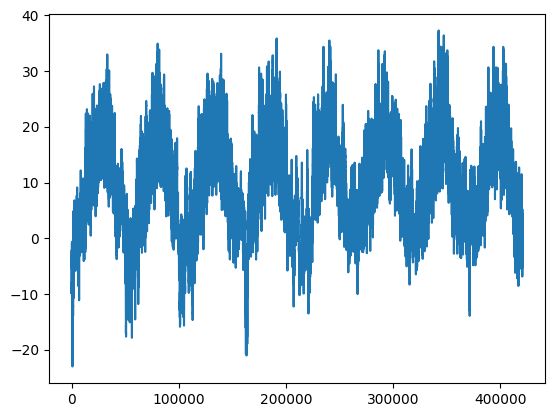

In [ ]:
temperature = df['T (degC)'].values
raw_data = df.drop("Date Time", axis="columns").values
plt.plot(temperature);

### Prepare the data
The problem we are trying to solve is: "given data covering the previous five days, and sampled once per hour, can we predict the temperature in 24 hours?"

As a first step, we are going to determine the number of rows to use for training, validating and testing. We will use a 50, 25, 25 split.

Next, we are going to normalize each feature independently using the mean and standard deviation calculated from the training examples.

In [ ]:
num_train_samples = int(0.5 * raw_data.shape[0])
num_val_samples = int(0.25 * raw_data.shape[0])
num_test_samples = raw_data.shape[0] - num_train_samples - num_val_samples

In [ ]:
mean = raw_data[:num_train_samples].mean(axis=0)
std = raw_data[:num_train_samples].std(axis=0)
raw_data = (raw_data - mean) / std

Use `timeseries_dataset_from_array` to create datasets that

- Sample every 6 samples (because we want data every hour)
- The sequences should have length 120 (because we want to use 5 days, i.e. 120 hours)
- The target should be delayed by $120 \times 6 + (24 - 1) \times 6$
- Use batches of size 256.
- Shuffle the training data, but not the validation nor the test data

Create a function `create_ds` that you call three times using the appropriate data.

In [ ]:
def create_ds(raw_data, target, shuffle=True,batch_size=256):

    sampling_rate=6
    sequence_length=120
    delay=sampling_rate * (sequence_length + 24 -1)
    return tf.keras.utils.timeseries_dataset_from_array(
        data=raw_data,
        targets=target[delay:],
        sampling_rate=sampling_rate,
        sequence_length=sequence_length,
        shuffle=shuffle,
        batch_size=batch_size
    )

train_dataset = create_ds(raw_data[:num_train_samples],
                          target=temperature[:num_train_samples])
val_dataset = create_ds(raw_data[num_train_samples:num_train_samples+num_val_samples],
                          target=temperature[num_train_samples:num_train_samples+num_val_samples],
                          shuffle=False)
test_dataset = create_ds(raw_data[num_train_samples+num_val_samples:],
                          target=temperature[num_train_samples+num_val_samples:],
                          shuffle=False)

In [ ]:
for samples, targets in train_dataset.take(1):
    print(f"samples shape: {samples.shape}")
    print(f"targets shape: {targets.shape}")

samples shape: (256, 120, 14)
targets shape: (256,)


In [ ]:
## Check correctness of the create_ds method by only using the data
my_check_ds = create_ds(
    raw_data=df.values[:1000,0],
    target=df.values[:1000,0],
    shuffle=False,
    batch_size=1
)

In [ ]:
for features, target in my_check_ds.take(2):
    print(f"{features} maps to {target}")
    print("*"*50)

[[b'01.01.2009 00:10:00' b'01.01.2009 01:10:00' b'01.01.2009 02:10:00'
  b'01.01.2009 03:10:00' b'01.01.2009 04:10:00' b'01.01.2009 05:10:00'
  b'01.01.2009 06:10:00' b'01.01.2009 07:10:00' b'01.01.2009 08:10:00'
  b'01.01.2009 09:10:00' b'01.01.2009 10:10:00' b'01.01.2009 11:10:00'
  b'01.01.2009 12:10:00' b'01.01.2009 13:10:00' b'01.01.2009 14:10:00'
  b'01.01.2009 15:10:00' b'01.01.2009 16:10:00' b'01.01.2009 17:10:00'
  b'01.01.2009 18:10:00' b'01.01.2009 19:10:00' b'01.01.2009 20:10:00'
  b'01.01.2009 21:10:00' b'01.01.2009 22:10:00' b'01.01.2009 23:10:00'
  b'02.01.2009 00:10:00' b'02.01.2009 01:10:00' b'02.01.2009 02:10:00'
  b'02.01.2009 03:10:00' b'02.01.2009 04:10:00' b'02.01.2009 05:10:00'
  b'02.01.2009 06:10:00' b'02.01.2009 07:10:00' b'02.01.2009 08:10:00'
  b'02.01.2009 09:10:00' b'02.01.2009 10:10:00' b'02.01.2009 11:10:00'
  b'02.01.2009 12:10:00' b'02.01.2009 13:10:00' b'02.01.2009 14:10:00'
  b'02.01.2009 15:10:00' b'02.01.2009 16:10:00' b'02.01.2009 17:10:00'
  b'02

### Esablish a common sense baseline
The most naive thing to do is to assume that the temperature 24 hours from now, will equal the current temperature.

Compute the MAE on the validation and test set. (You should get 2.44 and 2.62 respectively)

In [ ]:
def compute_mae_naive(dataset):
    mean = temperature[:num_train_samples].mean()
    std = temperature[:num_train_samples].std()

    total_error = 0.0
    total_samples = 0
    for samples, target in dataset:
    # Get last time step, feature with index 1 is the temperature
        current_temperature = samples[:, -1, 1] * std + mean
        total_error += np.sum(np.abs(target - current_temperature))
        total_samples += samples.shape[0]

    return total_error / total_samples

print(f"MAE on validation data: {compute_mae_naive(val_dataset):.2f}")
print(f"MAE on test data: {compute_mae_naive(test_dataset):.2f}")

MAE on validation data: 2.44
MAE on test data: 2.62


### Establish a non-sequence baseline
Create a simple feed-forward neural network consisting of one hidden layer of 16
neurons using the ReLu activation function, and one output layer. Both layers
are `Dense` layers.

- Use RMSProp as the optimizer (with the default learning rate), optimize the mean squared error, and track the mean absolute error as a metric.
- Use a callback to save the best model using `ModelCheckpoint`.
- Train for 10 epochs.
- Report the MAE on the test dataset

In [ ]:
train_dataset = train_dataset.cache().prefetch(1)
val_dataset = val_dataset.cache().prefetch(1)

tf.random.set_seed(42)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[120, raw_data.shape[-1]]),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1, activation=None)
])

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "jena_dense.keras",
    save_best_only=True
)

model.compile(
    optimizer="rmsprop",
    loss="mse",
    metrics=["mae"]
)

model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=[model_checkpoint]
)

In [ ]:
model = tf.keras.models.load_model("jena_dense.keras")
model.evaluate(test_dataset)

In [ ]:
model.summary()

### use a simple RNN layer
- Create  a single layer of `LSTM` cells, where each LSTM cell has 16 units.
- Add a single `Dense` layer on top of the (last) LSTM in order to retrieve a single number as output.
- Optimize your model is the same way as the previous Dense network.
**vetgedrukte tekst**

In [ ]:
model_lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units=16, input_shape=(None, raw_data.shape[-1])),
    tf.keras.layers.Dense(units=1, activation=None)
])

model_checkpoint_lstm = tf.keras.callbacks.ModelCheckpoint(
    "jena_lstm.keras",
    save_best_only=True
)

model_lstm.compile(
    optimizer="rmsprop",
    loss="mse",
    metrics=["mae"]
)

model_lstm.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=[model_checkpoint_lstm]
)

model_lstm.summary()

In [ ]:
model_lstm = tf.keras.models.load_model("jena_lstm.keras")
model_lstm.evaluate(test_dataset)

In [ ]:
model_lstm.evaluate(val_dataset)

### Use recurrent dropout to fight overfitting

- Drop 25 percent of the hidden state between time steps using the `recurrent_dropout` parameter.
- Double the number of units in the LSTM cell to 32 (because we rely on the dropout to combat overfitting.)
- Apply 50 percent dropout to the final output of the recurrent layer (i.e. prior to feeding it to the `Dense` output layer).


In [ ]:
model_lstm_dropout = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units=32, recurrent_dropout=0.25, input_shape=(None, raw_data.shape[-1])),
  tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=1, activation=None)
])

model_checkpoint_lstm_dropout = tf.keras.callbacks.ModelCheckpoint(
    "jena_lstm_dropout.keras",
    save_best_only=True
)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_mae",
    min_delta=0.001,
    patience=3
)

model_lstm_dropout.compile(
    optimizer="rmsprop",
    loss="mse",
    metrics=["mae"]
)

model_lstm_dropout.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,
    callbacks=[model_checkpoint_lstm, early_stopping_cb]
)

In [ ]:
model_lstm_dropout.evaluate(test_dataset)

# Implement an LSTM Cell
In this exercise we are going to implement an LSTM cell “from scratch”.

In [ ]:
class MyLSTMCell(tf.keras.layers.Layer):

  def __init__(self, units, **kwargs):
    super().__init__(**kwargs)

    self.state_size = [units,units]
    self.output_size = units

    self.dense_i = tf.keras.layers.Dense(
        units=units,
        bias_initializer="zeros",
        activation="sigmoid")

    self.dense_f = tf.keras.layers.Dense(
        units=units,
        bias_initializer="ones",
        activation="sigmoid")

    self.dense_g = tf.keras.layers.Dense(
        units=units,
        bias_initializer="zeros",
        activation="tanh")

    self.dense_o = tf.keras.layers.Dense(
        units=units,
        bias_initializer="zeros",
        activation="sigmoid")

  def call(self, inputs, outputs):
    memory_state = outputs[0] # h
    carry_state = outputs[1]  # c

    inputs_and_memory = tf.concat([inputs, memory_state], axis=-1)

    i = self.dense_i(inputs_and_memory)
    f = self.dense_f(inputs_and_memory)
    g = self.dense_g(inputs_and_memory)
    o = self.dense_o(inputs_and_memory)

    new_carry_state = f * carry_state + i * g
    y = o * tf.keras.activations.tanh(new_carry_state)

    return y, [y, new_carry_state]

### Optional: Check implementation

The implementation of `MyLSTMCell` is checked by comparing it to the working of the built-in `LSTMCell` of Keras.

We initialize both cells with the same weights and then run them througth a RNN and see whether they give the same output for the same input.

In [ ]:
BATCH_SIZE = 5
NUM_STEPS = 10
NUM_FEATURES = 3
UNITS=4
# Some random input
inputs = tf.random.normal([BATCH_SIZE, NUM_STEPS, NUM_FEATURES])

In [ ]:
# Check the output shape of running the cell
my_lstm_cell = MyLSTMCell(UNITS)
rnn = tf.keras.layers.RNN(my_lstm_cell)
output = rnn(inputs)
output.shape

In [ ]:
# Do the same for the built-in LSTMCell in Keras
cell = tf.keras.layers.LSTMCell(UNITS)
rnn2 = tf.keras.layers.RNN(cell)
output2 = rnn2(inputs)
output2.shape

The internal implementation of LSTMCell is different. It doesn't use `Dense` layers and organizes the weights into three tensors: `kernel`, `recurrent_kernel` and `bias`

In [ ]:
# Retrieve the weigths and check their shapes
kernel_weights, recurrent_kernel_weights, bias = rnn2.get_weights()
kernel_weights.shape, recurrent_kernel_weights.shape, bias.shape

Our implementation of an LSTM cell organizes the weights into 8 tensors (4 Dense layers with 2 weight tensors each)

In [ ]:
# Loop over the weights and print their size
for w in rnn.get_weights():
  print(w.shape)

Get the weights from our implementation and name them.
The order in which they were created matters!

In [ ]:
rnn_weights = rnn.get_weights()
i_w = rnn_weights[0]
i_b = rnn_weights[1]
f_w = rnn_weights[2]
f_b = rnn_weights[3]
c_w = rnn_weights[4]
c_b = rnn_weights[5]
o_w = rnn_weights[6]
o_b = rnn_weights[7]

In [ ]:
bias = tf.concat(values=[i_b, f_b, c_b, o_b],axis=-1)
kernel = tf.concat(values=[i_w[:NUM_FEATURES], f_w[:NUM_FEATURES], c_w[:NUM_FEATURES], o_w[:NUM_FEATURES]], axis=-1)
recurrent_kernel = tf.concat(values=[i_w[NUM_FEATURES:], f_w[NUM_FEATURES:], c_w[NUM_FEATURES:], o_w[NUM_FEATURES:]], axis=-1)
bias.shape

In [ ]:
# Set the weights on RNN2
rnn2.set_weights([kernel, recurrent_kernel,   bias])

Check that the result of running both RNNs is the same.  Eyeball the results.

In [ ]:
rnn2(inputs)

In [ ]:
rnn(inputs)

Use `tf.debugging.assert_near` to check that the results are actually "equal".

In [ ]:

tf.debugging.assert_near(rnn2(inputs), rnn(inputs))
print("OK")

# generating Text with a transformer (Decoder)

In [ ]:
# Suppress tensorflow warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
class GPTDecoderBlock(tf.keras.layers.Layer):
    """
    This class implements the "Decoder" block from the "Attention is all You Need" paper,
    but is doesn't include the multi-head (cross) attention because there is no encoder.
    """

    def __init__(self, num_heads, embed_size, **kwargs):
        super().__init__(**kwargs)

        self.num_heads = num_heads
        self.embed_size = embed_size

        self.masked_attn_layer = tf.keras.layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=embed_size // self.num_heads, # Correct ?? See section 3.2.2 of "attention is all you need" paper
        )

        self.norm1_layer = tf.keras.layers.LayerNormalization()

        self.dense1_layer = tf.keras.layers.Dense(
            units=4*embed_size,
            activation="relu") # See section 3.3 of "attention is all you need" paper
        # No activation function on second dense layer
        self.dense2_layer = tf.keras.layers.Dense(units=embed_size)

        self.norm2_layer = tf.keras.layers.LayerNormalization()



    def call(self, inputs):

        # Masked Multi-Head (Self)-Attention block
        skip = inputs
        inputs = self.masked_attn_layer(
            query=inputs,
            value=inputs,
            use_causal_mask=True)
        inputs = self.norm1_layer(
            tf.keras.layers.Add()([inputs, skip]))

        # Feedforward block
        skip = inputs
        inputs = self.dense1_layer(inputs)
        inputs = self.dense2_layer(inputs)

        inputs = self.norm2_layer(
            tf.keras.layers.Add()([inputs, skip]))

        return inputs


In [ ]:
## Test the block, e.g. by testing the output for an input
## of shape (2, 10, 64)
block = GPTDecoderBlock(num_heads=4, embed_size=64)
X = tf.constant(0., shape=(2, 10, 64))
block(X).shape

## Prepare the data for Shakespeare text generation

In [ ]:
SEQ_LENGTH = 100

In [ ]:
# Fetch the data, same as in book
shakespeare_url = "https://homl.info/shakespeare"  # shortcut URL
filepath = tf.keras.utils.get_file("shakespeare.txt", shakespeare_url)
with open(filepath) as f:
    shakespeare_text = f.read() # shakespeare_text is now a string

We ’ll use atf.keras.layers. TextVectorization layer to encode this text. Split on characters, keep punctuation as well as upper- and lowercase letters

In [ ]:
# Split on characters, keep punctuation as well as upper- and lowercase letters
text_vec_layer = tf.keras.layers.TextVectorization(
  split="character", standardize=None) # also keep upper case etc.
# shakespeare_text is a string and adapt expects a dataset or list
text_vec_layer.adapt([shakespeare_text])
encoded = text_vec_layer([shakespeare_text])[0]

In [ ]:
print(text_vec_layer.get_vocabulary())
print(len(text_vec_layer.get_vocabulary()))

Code Gegeven in opgave

In [ ]:
encoded -= 2  # drop tokens 0 (pad) and 1 (unknown), which we will not use
              # use broadcasting to subtract 2 from all values
n_tokens = text_vec_layer.vocabulary_size() - 2  # number of distinct chars = 65
dataset_size = len(encoded)  # total number of chars = 1,115,394

In [ ]:
# create sequence to sequence dataset, same as in book
def to_dataset(sequence, length, shuffle=False, seed=None, batch_size=32):
    ds = tf.data.Dataset.from_tensor_slices(sequence)
    ds = ds.window(length + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda window_ds: window_ds.batch(length + 1))
    if shuffle:
        ds = ds.shuffle(100_000, seed=seed)
    ds = ds.batch(batch_size)
    return ds.map(lambda window: (window[:, :-1], window[:, 1:])).prefetch(1)

In [ ]:
# Create training, validation and test data set. Same as in book.
tf.random.set_seed(42)
train_set = to_dataset(encoded[:1_000_000], length=SEQ_LENGTH, shuffle=True,
                       seed=42)
valid_set = to_dataset(encoded[1_000_000:1_060_000], length=SEQ_LENGTH)
test_set = to_dataset(encoded[1_060_000:], length=SEQ_LENGTH)

## create the model

Take a good look at the image of the transformer architecture. Which layers do we need to create the model?
- Embedding layer
- Positional embedding layer
- N GPTDecoderBlock layers
- Dense layer using softmax as activation function.

Create a model, using the Subclassing API

In [ ]:
class GPTModel(tf.keras.Model):

    def __init__(self, n_tokens, embed_size, num_blocks, num_heads, max_seq_length, **kwargs):

        super().__init__(**kwargs)

        self.num_heads = num_heads
        self.max_seq_length = max_seq_length

        # Layers
        self.embed_layer = tf.keras.layers.Embedding(
            input_dim=n_tokens,
            output_dim=embed_size,
            name='embedding')
        self.pos_embed_layer = tf.keras.layers.Embedding(
            input_dim=max_seq_length,
            output_dim=embed_size,
            name='positional_embedding')
        #self.add_layer = tf.keras.layers.Add()
        self.decoder_blocks = [GPTDecoderBlock(
            num_heads=num_heads,
            embed_size=embed_size,
            name='GPTBlock' + str(i)) for i in range(num_blocks)]
        self.dense_layer = tf.keras.layers.Dense(
            units=n_tokens,
            activation='softmax',
            name='output')

    def call(self, inputs):

        embeddings = self.embed_layer(inputs)

        pos_embeddings = self.pos_embed_layer(tf.range(self.max_seq_length))


        embeddings = embeddings + pos_embeddings # Rely on broadcasting

        for decoder_block in self.decoder_blocks:
            embeddings = decoder_block(embeddings)

        output = self.dense_layer(embeddings)

        return output

## instantiate a Model and Train it

In [ ]:
EMBED_SIZE = 32
NUM_HEADS = 4
NUM_BLOCKS = 2

In [ ]:
tf.keras.backend.clear_session()
model = GPTModel(n_tokens=n_tokens,
                  embed_size=EMBED_SIZE,
                  num_blocks=NUM_BLOCKS,
                  num_heads=NUM_HEADS,
                  max_seq_length=SEQ_LENGTH
                 )

In [ ]:
for X, Y in train_set.take(1):
    print(X.shape)
    print(model(X).shape)

In [ ]:
model.summary()

In [ ]:
model.compile(
    optimizer='nadam',
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"]
)

In [ ]:
# 10 minutes per epoch on a (fast) GPU
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)
model.fit(train_set, validation_data=valid_set, epochs=20, callbacks=[early_stopping])

## generating Text

gegeven in de oef:

In [ ]:
# Create a model that includes the textvectorization layer (same as in book)
shakespeare_model = tf.keras.Sequential([
  text_vec_layer,
  tf.keras.layers.Lambda(lambda X: X - 2),  # no <PAD> or <UNK> tokens
  model
])

Check the shape of the model when trying to make predictions for one sentence.

Note: you can only give the model sentences that have length exactly equal to the length that was used when training the model.
This is because we always used this length when computing the positional embeddings.

In [ ]:
y_proba = shakespeare_model.predict(["HAMLET" + ' '*(SEQ_LENGTH-6)])
y_proba.shape

Adapt the `next_char` method from the book so that it works for the transformer model we trained.

In [ ]:
def next_char(text, temperature=1):
    # shakepeare_model is the model we trained earlier
    y_proba = shakespeare_model.predict([text + ' ' * (SEQ_LENGTH-len(text))])[0, len(text) - 1:len(text)]
    rescaled_logits = tf.math.log(y_proba) / temperature
    char_id = tf.random.categorical(rescaled_logits, num_samples=1)[0, 0]
    # text_vec_layer is the layer we adapted earlier
    return text_vec_layer.get_vocabulary()[char_id + 2]

Adapt the `extend_text` method from the book.

We should be able to generate texts of arbitrary lengths.  Make sure to try your method when predicting at least one hundred characters.

In [ ]:
def extend_text(text, n_chars=50, temperature=1):
    for _ in range(n_chars):
        text += next_char(text[-SEQ_LENGTH:], temperature)
    return text

In [ ]:
extend_text("HAMLET:", n_chars=100, temperature=0.2)

# Convert Dates Exercise

In [ ]:
import faker
import random
import tqdm
import babel.dates

fake = faker.Faker()
faker.Faker.seed(12345)
random.seed(12345)

# Define format of the data we would like to generate
FORMATS = ['short',
           'medium',
           'long',
           'full',
           'full',
           'full',
           'full',
           'full',
           'full',
           'full',
           'full',
           'full',
           'full',
           'd MMM YYY',
           'd MMMM YYY',
           'dd MMM YYY',
           'd MMM, YYY',
           'd MMMM, YYY',
           'dd, MMM YYY',
           'd MM YY',
           'd MMMM YYY',
           'MMMM d YYY',
           'MMMM d, YYY',
           'dd.MM.YY']

# change this if you want it to work with another language
LOCALES = ['nl_NL', 'de_DE']


def load_date():
    """
        Loads some fake dates
        :returns: tuple containing human readable string, machine readable string, and date object
    """
    dt = fake.date_object()

    try:
        human_readable = babel.dates.format_date(dt, format=random.choice(FORMATS),
                                     locale=random.choice(LOCALES)) # locale=random.choice(LOCALES))
        human_readable = human_readable.lower()
        human_readable = human_readable.replace(',','')
        machine_readable = dt.isoformat()

    except AttributeError as e:
        return None, None, None

    return human_readable, machine_readable, dt


def load_dataset(m):
    """
        Loads a dataset with m examples and vocabularies
        :m: the number of examples to generate
    """

    dataset = []

    for i in range(m):
        h, m, _ = load_date()
        if h is not None:
            dataset.append((h, m))

    return dataset

In [ ]:
m = 20_000
dataset = load_dataset(m)

In [ ]:
dataset[:20]

## start of the assignment

Chop original dataset in three parts. First 10000 for training,
next 5000 for validation and last 5000 for testing.

In [ ]:
train = dataset[:10_000]
valid = dataset[10_000:15_000]
test = dataset[15_000:20_000]

In [ ]:
train_human, train_machine = zip(*train)
valid_human, valid_machine = zip(*valid)
test_human, test_machine = zip(*test)

In [ ]:
train_human[:10]

In [ ]:
human_text_vec_layer = tf.keras.layers.TextVectorization(
    split="character",
    standardize=None
)
human_text_vec_layer.adapt(train_human)
print(human_text_vec_layer.get_vocabulary())
print(len(human_text_vec_layer.get_vocabulary()))

In [ ]:
machine_text_vec_layer = tf.keras.layers.TextVectorization(
    split="character",
    standardize=None
)
machine_text_vec_layer.adapt(train_machine)
print(machine_text_vec_layer.get_vocabulary())
print(len(machine_text_vec_layer.get_vocabulary()))

In [ ]:
human_text_vec_layer(["29 oktober 2023", "1 mei 1978 ??"])

## Een eerste gemakkelijk model.

- GRU model voor encoder. Vector als uitvoer.
- Deze vector invoeren als iedere stap bij de decoder.


In [ ]:
X_train = human_text_vec_layer(train_human)
y_train = machine_text_vec_layer(train_machine)
X_valid = human_text_vec_layer(valid_human)
y_valid = machine_text_vec_layer(valid_machine)
X_test = human_text_vec_layer(test_human)
y_test = machine_text_vec_layer(test_machine)
X_train.shape, y_train.shape

- the encoder consists of two layers:
  - Start with an Embeddinglayer that maps each of the input_vocab_size input characters to a vector of size embedding_size.
  - Since we want to ignore padding characters, set the mask_zero argument to True.
  - Next, we use a recurrent GRU layer with recurrent_units units

- The decoder consists also of two layers:
  - A recurrent GRU layer with recurrent_units units that should return the full sequence of outputs.
  - On top of this GRU you add a (time-distributed) fully connected layer, that should output a vector of size output_vocab_size at each time step that represents the probability distribution over the output characters

In [ ]:
def get_model_1(input_vocab_size,
                output_vocab_size,
                output_seq_length=10,
                embedding_size=16,
                recurrent_units=64):

  encoder = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        input_dim=input_vocab_size,
        output_dim=embedding_size,
        mask_zero=True),
    tf.keras.layers.GRU(units=recurrent_units),
  ])

  decoder = tf.keras.Sequential([
    tf.keras.layers.GRU(units=recurrent_units, return_sequences=True),
    tf.keras.layers.Dense(
        units=output_vocab_size,
        activation="softmax"
    )
  ])

  model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.RepeatVector(output_seq_length),
    decoder
  ])

  return model

create and instance of the model

In [ ]:
tf.keras.backend.clear_session()
model = get_model_1(
    input_vocab_size=len(human_text_vec_layer.get_vocabulary()),
    output_vocab_size=len(machine_text_vec_layer.get_vocabulary()),
)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)
model.summary()

train the model

In [ ]:
model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_valid, y_valid))

In [ ]:
datums = ["1 mei 2023", "zondag 29 oktober 2023"]
human_text_vec_layer(datums)

Write a function convert_dates that converts a list of human readable dates to a list of machine readable dates.
- First transform the human readable dates to a sequence of integerIDs.
- The model returns the predictions of the probabilities for each of the output characters
- Find the index of the largest probability (using tf.math.argmax(...))
- Convert machine_text_vec_layer.get_vocabulary()into  a numpy-array.
- Use this numpy-array and the previously found index to get thecorrect output character.
- Make sure to understand the input and output shapes

In [ ]:
def convert_dates(model, dates):
  # Model: verwacht (batch, seq_length) als invoer.
  #        Retourneert, (batch, seq_out_length, num_out_tokens)
  # Datums: lijst van strings met input datums
  model_proba_predictions = model(human_text_vec_layer(dates))
  model_predictions = tf.math.argmax(model_proba_predictions, axis=-1) # (batch, seq_out_length)
  machine_vocabulary = np.asarray(machine_text_vec_layer.get_vocabulary())
  return [''.join(row) for row in machine_vocabulary[model_predictions]]


In [ ]:
datums = ["1 mei 2023", "zondag 29 oktober 2023"]
convert_dates(model, datums)

## tweede model

The second model will be more representative of (older) models for natural language translation. It will consist of an encoder and a decoder.
- The encoder will use an RNN to compute a vector representation of theinput sequence. This is the finalstateof the RNN.
- The decoder will use this final state as its initial state. At each time step, we will feed the decoder a vector representation of the previous characterin the target sequence. In other words, during training the decoder is givenas input the character that it should have output at the previous step, regardless of what it actually output.The decoder will then output a score for each character in the output vocabulary, then the softmax activation function turns these scores into probabilities.
- At inference time (after training), you will not have the target to feed tothe decoder. Instead, you need to feed it the character that it has justoutput at the previous step.

The first model only had a single input sequence, the new model will have aninput both for the encoder and the decoder. - The inputs for the encoder are
the dates in free format, we will then view these as sequences of characters. -The inputs for the decoder are that dates in standard format, but with a “startof sequence” token prepended. This will be explained.

In [ ]:
machine_trslt_text_vec_layer = tf.keras.layers.TextVectorization(
    split="character",
    standardize=None
)
machine_trslt_text_vec_layer.adapt(["." + date + "*" for date in train_machine])
print(machine_trslt_text_vec_layer.get_vocabulary())
print(len(machine_trslt_text_vec_layer.get_vocabulary()))

In [ ]:
X_train = tf.constant(train_human)
X_valid = tf.constant(valid_human)

X_train_dec = tf.constant(["." + date for date in train_machine])
X_valid_dec = tf.constant(["." + date for date in valid_machine])

Y_train_dec = machine_trslt_text_vec_layer(tf.constant([date + "*" for date in train_machine]))
Y_valid_dec = machine_trslt_text_vec_layer(tf.constant([date + "*" for date in valid_machine]))


In [ ]:
def get_model_2(encoder_vectorizer_layer,
                decoder_vectorizer_layer,
                embedding_size=16,
                recurrent_units=64):

  # Define input layers
  encoder_inputs = tf.keras.layers.Input(shape=[], dtype=tf.string, name="enc_input")
  decoder_inputs = tf.keras.layers.Input(shape=[], dtype=tf.string, name="dec_input")

  # Vectorize the strings
  encoder_input_ids = encoder_vectorizer_layer(encoder_inputs)
  decoder_input_ids = decoder_vectorizer_layer(decoder_inputs)

  # Define the embedding layers that sit in front of the encoder and the decoder
  encoder_embedding_layer = tf.keras.layers.Embedding(
      input_dim=len(encoder_vectorizer_layer.get_vocabulary()),
      output_dim=embedding_size,
      mask_zero=True,
      name="enc_embed"
  )

  decoder_embedding_layer = tf.keras.layers.Embedding(
      input_dim=len(decoder_vectorizer_layer.get_vocabulary()),
      output_dim=embedding_size,
      mask_zero=True,
      name="dec_embed"
  )

  # Apply the embedding layers to the integer identifiers of the tokens
  encoder_embeddings = encoder_embedding_layer(encoder_input_ids)
  decoder_embeddings = decoder_embedding_layer(decoder_input_ids)

  # Define the RNN using GRU cells. Make sure that the encoder returns the state
  # Note: when using a GRU the state and the output are the same but this is
  # not the case if we would switch to an LSTM
  encoder = tf.keras.layers.GRU(units=recurrent_units,
                                return_state=True,
                                name="enc_rnn")

  # Call the RNN on the encoder_embeddings
  encoder_outputs, encoder_state = encoder(encoder_embeddings)

  # Define the RNN for the decoder. Make sure that this one returns sequences
  # as we want to predict the next character at each time step
  decoder = tf.keras.layers.GRU(units=recurrent_units,
                                return_sequences=True,
                                name="dec_rnn")

  # Call the decoder with the decoder embeddings as input and the final state
  # of the encoder as the initial state
  decoder_outputs = decoder(inputs=decoder_embeddings, initial_state=encoder_state)

  # Define (time-distributed) fully connected layer.
  output_layer = tf.keras.layers.Dense(
      units=len(decoder_vectorizer_layer.get_vocabulary()),
      activation='softmax',
      name="fc_out"
      )

  # Apply the dense layer to each decoder output
  # in order to predict the next character.
  Y_proba = output_layer(decoder_outputs)

  # Define the model. It has two inputs and one output
  model = tf.keras.Model(
    inputs=[encoder_inputs, decoder_inputs],
    outputs=[Y_proba]
  )

  return model

In [ ]:
model2 = get_model_2(
    encoder_vectorizer_layer=human_text_vec_layer,
    decoder_vectorizer_layer=machine_trslt_text_vec_layer
)

model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam", metrics=["accuracy"])

model2.summary()

In [ ]:
model2.fit(
    (X_train, X_train_dec),
    Y_train_dec,
    epochs=30,
    batch_size=32,
    validation_data=((X_valid, X_valid_dec), Y_valid_dec)
    )

In [ ]:
def convert_date_2(model2, date):
  # date should be a string
  # Convert a single date

  vocabulary = np.asarray(machine_trslt_text_vec_layer.get_vocabulary())

  encoder_inputs = tf.constant([date])
  current_string = "." # start of sequence token
  last_predicted_character = ''
  i = 0
  while last_predicted_character != '*': # End of sequence token
    current_string += last_predicted_character
    decoder_inputs = tf.constant([current_string])
    y_probas = model2([encoder_inputs, decoder_inputs])
    y_last_char_ids = tf.math.argmax(y_probas[:, -1], axis=-1)
    last_chars = vocabulary[y_last_char_ids]
    last_predicted_character = last_chars[0] # only one item in batch

  return current_string[1:]



In [ ]:
convert_date_2(model2, "1 januari 1970")